In [26]:
import pandas as pd
import numpy as np
import math

In [37]:
experiments = 5
epochs = 100

activations = ['sigmoid', 'tanh', 'relu', 'linear', 'elu', 'selu', 'softplus', 'softsign', 'hard_sigmoid', 'LeakyReLU', 'PReLU', 'ThresholdedReLU']
# activations = ['sigmoid', 'tanh', 'relu', 'linear', 'elu', 'softplus', 'softsign', 'hard_sigmoid', 'LeakyReLU', 'PReLU']
optimizers = ['rmsp', 'adam', 'sgd', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
# colors = ['b', 'g', 'k', 'y', 'm', 'r', 'c']
colors = ['#000000', '#330000', '#660000', '#990000', '#CC0000', '#FF0000',
          '#003300', '#006600', '#009900', '#00CC00', '#00FF00',
          '#000033', '#000066', '#000099', '#0000CC', '#0000FF',
          '#033000', '#066000', '#099000', '#0CC000', '#0FF000',
          '#000330', '#000660', '#000990', '#000CC0', '#000FF0']
lines = ['-', '--', ':', '-.']
cols_f = []
for c in colors:
    for l in lines:
        cols_f.append(c+l)
        

columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']
data = []

i = 0
for act in activations:
    for opt in optimizers:
        item_data = []
        
        data.append({
            'name': '',
            'disp_name': act + '_' + opt,
            'col': colors[i % len(colors)],
            'line': lines[i % len(lines)],
            'act': act,
            'opt':opt,
            'data' : [pd.read_csv('./logs/mnist_lr_' + act +'_' + opt + '_' + str(ex)  + '_64.csv', sep=';') for ex in range(experiments)],
            'averaged': pd.DataFrame(columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']),
            'best': {
                'max_acc':0,
                'max_acc_epoch':0,
                'min_loss':0,
                'min_loss_epoch':0,
                'max_val_acc':0,
                'max_val_acc_epoch':0,
                'min_val_loss':0,
                'min_val_loss_epoch':0,
                'val_acc_diff': 0
            }
        })
        i+=1

max_epoch = 0
        

In [38]:
check = pd.DataFrame(columns=['config', 'exp', 'acc', 'loss', 'val_acc', 'val_loss', 'opt', 'act'])
i=0
for d in range(len(data)):
    for experiment in range(experiments):
        check.loc[i] = [data[d]['disp_name'], 
                          experiment,
                          data[d]['data'][experiment]['acc'].tolist()[-1], 
                          data[d]['data'][experiment]['loss'].tolist()[-1], 
                          data[d]['data'][experiment]['val_acc'].tolist()[-1], 
                          data[d]['data'][experiment]['val_loss'].tolist()[-1], 
                          data[d]['opt'], 
                          data[d]['act']]
        i+=1


In [39]:
check = check.sort_values(by=['val_acc'])
check.to_csv('./var_lr_check.csv')
check

config  exp       acc      loss  val_acc  val_loss       opt  \
116       linear_sgd  1.0  0.913050  0.309703   0.9206  0.272636       sgd   
117       linear_sgd  2.0  0.911933  0.310285   0.9218  0.270918       sgd   
119       linear_sgd  4.0  0.912117  0.306582   0.9221  0.272385       sgd   
115       linear_sgd  0.0  0.915017  0.304581   0.9223  0.271048       sgd   
118       linear_sgd  3.0  0.917067  0.295666   0.9240  0.268246       sgd   
122   linear_Adagrad  2.0  0.919633  0.284915   0.9252  0.264929   Adagrad   
123   linear_Adagrad  3.0  0.920550  0.285692   0.9253  0.264670   Adagrad   
126  linear_Adadelta  1.0  0.923783  0.276759   0.9253  0.264956  Adadelta   
121   linear_Adagrad  1.0  0.919883  0.288916   0.9255  0.265987   Adagrad   
114      linear_adam  4.0  0.927350  0.261868   0.9257  0.268011      adam   
120   linear_Adagrad  0.0  0.918433  0.288683   0.9258  0.263619   Adagrad   
125  linear_Adadelta  0.0  0.922300  0.281309   0.9258  0.264808  Adadelta   
124   linear_Adagrad  4.0  0.919533  0.284790   0.9260  0.264683   Adagrad   
113      linear_adam  3.0  0.927417  0.262141   0.9260  0.269125      adam   
134    linear_Adamax  4.0  0.926283  0.265245   0.9261  0.266278    Adamax   
133    linear_Adamax  3.0  0.926000  0.268482   0.9261  0.264773    Adamax   
130    linear_Adamax  0.0  0.926983  0.266413   0.9261  0.265945    Adamax   
129  linear_Adadelta  4.0  0.922633  0.280802   0.9261  0.264565  Adadelta   
136     linear_Nadam  1.0  0.929750  0.254297   0.9264  0.272328     Nadam   
132    linear_Adamax  2.0  0.926033  0.266420   0.9264  0.265576    Adamax   
110      linear_adam  0.0  0.926350  0.267118   0.9265  0.267327      adam   
128  linear_Adadelta  3.0  0.921700  0.280486   0.9265  0.265047  Adadelta   
137     linear_Nadam  2.0  0.929900  0.256742   0.9266  0.270646     Nadam   
112      linear_adam  2.0  0.927667  0.260940   0.9266  0.268306      adam   
131    linear_Adamax  1.0  0.925217  0.269505   0.9267  0.266107    Adamax   
138     linear_Nadam  3.0  0.931250  0.253963   0.9268  0.274803     Nadam   
106      linear_rmsp  1.0  0.924683  0.277638   0.9268  0.271667      rmsp   
111      linear_adam  1.0  0.926817  0.263354   0.9269  0.269033      adam   
108      linear_rmsp  3.0  0.923917  0.278015   0.9269  0.270623      rmsp   
107      linear_rmsp  2.0  0.924783  0.272774   0.9270  0.273285      rmsp   
..               ...  ...       ...       ...      ...       ...       ...   
149         elu_adam  4.0  0.986717  0.039949   0.9797  0.076183      adam   
79         relu_adam  4.0  0.988317  0.035104   0.9797  0.079609      adam   
75         relu_adam  0.0  0.986750  0.038652   0.9797  0.077866      adam   
145         elu_adam  0.0  0.985533  0.041778   0.9798  0.074252      adam   
355       PReLU_adam  0.0  0.984117  0.048716   0.9799  0.077791      adam   
242   softplus_Nadam  2.0  0.987783  0.040155   0.9799  0.091916     Nadam   
218    softplus_adam  3.0  0.983933  0.048929   0.9800  0.077826      adam   
78         relu_adam  3.0  0.985667  0.042178   0.9801  0.076978      adam   
141         elu_rmsp  1.0  0.981300  0.062914   0.9802  0.088573      rmsp   
168       elu_Adamax  3.0  0.980650  0.058531   0.9802  0.065536    Adamax   
161     elu_Adadelta  1.0  0.978850  0.065781   0.9803  0.070176  Adadelta   
216    softplus_adam  1.0  0.984333  0.049055   0.9803  0.074398      adam   
166       elu_Adamax  1.0  0.980900  0.056085   0.9803  0.069022    Adamax   
103       relu_Nadam  3.0  0.986350  0.040859   0.9804  0.084546     Nadam   
140         elu_rmsp  0.0  0.983150  0.055705   0.9805  0.087545      rmsp   
384      PReLU_Nadam  4.0  0.986800  0.040403   0.9805  0.084152     Nadam   
176        selu_rmsp  1.0  0.978017  0.076273   0.9805  0.125189      rmsp   
163     elu_Adadelta  3.0  0.976533  0.072957   0.9806  0.067716  Adadelta   
172        elu_Nadam  2.0  0.990000  0.029920   0.9806  0.076898     Nadam   
207       selu_Nadam  2.0  0.987333 

In [40]:
for d in range(len(data)):
    max_acc = 0 
    max_val_acc = 0
    min_loss = 100
    min_val_loss = 100
    val_acc_diff = 0.
    
    min_val_acc_diff_10 = 1.
    min_val_acc_diff_epoch = 0
    
    has_hit = False

    for epoch in range(epochs):
        acc = []
        loss = []
        val_acc = []
        val_loss = []
        val_acc_diffs = []
        
        for experiment in range(experiments):
            acc.append(data[d]['data'][experiment].iloc[epoch]['acc'])
            loss.append(data[d]['data'][experiment].iloc[epoch]['loss'])
            val_acc.append(data[d]['data'][experiment].iloc[epoch]['val_acc'])
            val_loss.append(data[d]['data'][experiment].iloc[epoch]['val_loss'])
            if epoch > 0:
                val_acc_diffs.append(data[d]['data'][experiment].iloc[epoch]['val_acc'] - data[d]['data'][experiment].iloc[epoch-1]['val_acc'])
            else:
                val_acc_diffs.append(0)
        
        av_acc = sum(acc)/len(acc)
        av_loss = sum(loss)/len(loss)
        av_val_acc = sum(val_acc)/len(val_acc)
        av_val_loss = sum(val_loss)/len(val_loss)
        av_val_acc_diffs = sum(val_acc_diffs)/len(val_acc_diffs)
        std = np.std(val_acc)
        
        print('Config: ' + data[d]['disp_name'] + ' | epoch ' + str(epoch) + ' | range ' + str(np.min(val_acc)) + ' - ' + str(np.max(val_acc)) + ' | diff '+ str(np.max(val_acc) - np.min(val_acc)) + ' | std ' + str(std))

        if(av_acc > max_acc):
            max_acc = av_acc
            data[d]['best']['max_acc'] = max_acc
            data[d]['best']['max_acc_epoch'] = epoch
        
#         if(av_val_acc > max_val_acc):
#             max_val_acc = av_val_acc
#             data[d]['best']['max_val_acc'] = max_acc
#             data[d]['best']['max_val_acc_epoch'] = epoch+1
        
        if(av_loss < min_loss):
            min_loss = av_loss
            data[d]['best']['min_loss'] = min_loss
            data[d]['best']['min_loss_epoch'] = epoch
        
        if(av_val_loss < min_val_loss):
            min_val_loss = av_val_loss
            data[d]['best']['min_val_loss'] = min_val_loss
            data[d]['best']['min_val_loss_epoch'] = epoch
        
        
        
        data[d]['averaged'] = data[d]['averaged'].append({
            'epoch': epoch,
            'acc': (av_acc),
            'loss': (av_loss),
            'val_acc': (av_val_acc),
            'val_loss': (av_val_loss),
            'val_acc_diff' : av_val_acc_diffs,
            'val_acc_std': std}, ignore_index=True)
        
        if epoch>6:
            av_val_acc_diff_10 = np.mean(np.absolute(data[d]['averaged'].iloc[epoch-7:epoch]['val_acc_diff'].values))
            
            if av_val_acc_diff_10 < 0.00005 and av_val_acc > max_val_acc:
                max_val_acc = av_val_acc
                data[d]['best']['max_val_acc'] = max_acc
                data[d]['best']['max_val_acc_epoch'] = epoch
                has_hit = True
#                 print('Config: ' + data[d]['disp_name'] + ', epoch: ' + str(epoch) + ', val_acc: '+ str(av_val_acc) +', diff: ' + str(av_val_acc_diffs) + ', av_diff: ' + str(av_val_acc_diff_10) + ' HIT!')
#             else:
#                 print('Config: ' + data[d]['disp_name'] + ', epoch: ' + str(epoch) + ', val_acc: '+ str(av_val_acc) +', diff: ' + str(av_val_acc_diffs) + ', av_diff: ' + str(av_val_acc_diff_10))
    if not has_hit:
        data[d]['best']['max_val_acc'] = data[d]['averaged'].iloc[epochs-1]['val_acc']
        data[d]['best']['max_val_acc_epoch'] = epochs
#         print('Config: ' + data[d]['disp_name'] + ' had no hits, max val_acc: '+ str(data[d]['best']['max_val_acc']) +' at epoch ' + str(data[d]['best']['max_val_acc_epoch']))
#     else:
#         print('Config: ' + data[d]['disp_name'] + ' HAD HITS, max val_acc: '+ str(data[d]['best']['max_val_acc']) +' at epoch ' + str(data[d]['best']['max_val_acc_epoch']))

Config: sigmoid_rmsp | epoch 0 | range 0.9065 - 0.9112 | diff 0.0047 | std 0.00175385290147
Config: sigmoid_rmsp | epoch 1 | range 0.9268 - 0.9309 | diff 0.0041 | std 0.00131848397791
Config: sigmoid_rmsp | epoch 2 | range 0.938 - 0.9403 | diff 0.0023 | std 0.000828009661779
Config: sigmoid_rmsp | epoch 3 | range 0.9458 - 0.9476 | diff 0.0018 | std 0.00066211781429
Config: sigmoid_rmsp | epoch 4 | range 0.9489 - 0.9513 | diff 0.0024 | std 0.000924337600663
Config: sigmoid_rmsp | epoch 5 | range 0.9523 - 0.9554 | diff 0.0031 | std 0.00103807514179
Config: sigmoid_rmsp | epoch 6 | range 0.9569 - 0.9604 | diff 0.0035 | std 0.00119565881421
Config: sigmoid_rmsp | epoch 7 | range 0.9581 - 0.9614 | diff 0.0033 | std 0.00121095004026
Config: sigmoid_rmsp | epoch 8 | range 0.9588 - 0.9635 | diff 0.0047 | std 0.00174401834853
Config: sigmoid_rmsp | epoch 9 | range 0.9621 - 0.964 | diff 0.0019 | std 0.00064930732323
Config: sigmoid_rmsp | epoch 10 | range 0.9634 - 0.9669 | diff 0.0035 | std 0.00

Config: sigmoid_rmsp | epoch 95 | range 0.9731 - 0.9761 | diff 0.003 | std 0.00108148046677
Config: sigmoid_rmsp | epoch 96 | range 0.9731 - 0.9761 | diff 0.003 | std 0.00108148046677
Config: sigmoid_rmsp | epoch 97 | range 0.9731 - 0.9761 | diff 0.003 | std 0.00108148046677
Config: sigmoid_rmsp | epoch 98 | range 0.9731 - 0.9761 | diff 0.003 | std 0.00108148046677
Config: sigmoid_rmsp | epoch 99 | range 0.9731 - 0.9761 | diff 0.003 | std 0.00108148046677
Config: sigmoid_adam | epoch 0 | range 0.909 - 0.915 | diff 0.006 | std 0.00226132704402
Config: sigmoid_adam | epoch 1 | range 0.9279 - 0.9338 | diff 0.0059 | std 0.00223015694515
Config: sigmoid_adam | epoch 2 | range 0.9395 - 0.944 | diff 0.0045 | std 0.00163584840373
Config: sigmoid_adam | epoch 3 | range 0.9473 - 0.9496 | diff 0.0023 | std 0.000772010362625
Config: sigmoid_adam | epoch 4 | range 0.9522 - 0.9544 | diff 0.0022 | std 0.000843800924389
Config: sigmoid_adam | epoch 5 | range 0.9563 - 0.9604 | diff 0.0041 | std 0.00151

Config: sigmoid_adam | epoch 91 | range 0.9746 - 0.9772 | diff 0.0026 | std 0.000955824251628
Config: sigmoid_adam | epoch 92 | range 0.9746 - 0.9772 | diff 0.0026 | std 0.000955824251628
Config: sigmoid_adam | epoch 93 | range 0.9746 - 0.9772 | diff 0.0026 | std 0.000955824251628
Config: sigmoid_adam | epoch 94 | range 0.9746 - 0.9772 | diff 0.0026 | std 0.000955824251628
Config: sigmoid_adam | epoch 95 | range 0.9746 - 0.9772 | diff 0.0026 | std 0.000955824251628
Config: sigmoid_adam | epoch 96 | range 0.9746 - 0.9772 | diff 0.0026 | std 0.000955824251628
Config: sigmoid_adam | epoch 97 | range 0.9746 - 0.9772 | diff 0.0026 | std 0.000955824251628
Config: sigmoid_adam | epoch 98 | range 0.9746 - 0.9772 | diff 0.0026 | std 0.000955824251628
Config: sigmoid_adam | epoch 99 | range 0.9746 - 0.9772 | diff 0.0026 | std 0.000955824251628
Config: sigmoid_sgd | epoch 0 | range 0.2 - 0.384 | diff 0.184 | std 0.0585152766378
Config: sigmoid_sgd | epoch 1 | range 0.4383 - 0.6218 | diff 0.1835 |

Config: sigmoid_sgd | epoch 90 | range 0.9308 - 0.9351 | diff 0.0043 | std 0.00157149610245
Config: sigmoid_sgd | epoch 91 | range 0.9313 - 0.936 | diff 0.0047 | std 0.00176680502603
Config: sigmoid_sgd | epoch 92 | range 0.9314 - 0.9365 | diff 0.0051 | std 0.00187339264438
Config: sigmoid_sgd | epoch 93 | range 0.9317 - 0.9368 | diff 0.0051 | std 0.00178101094887
Config: sigmoid_sgd | epoch 94 | range 0.9321 - 0.9375 | diff 0.0054 | std 0.00193742096613
Config: sigmoid_sgd | epoch 95 | range 0.933 - 0.9373 | diff 0.0043 | std 0.00156281796765
Config: sigmoid_sgd | epoch 96 | range 0.9335 - 0.938 | diff 0.0045 | std 0.00163633737353
Config: sigmoid_sgd | epoch 97 | range 0.9337 - 0.9382 | diff 0.0045 | std 0.00161789987329
Config: sigmoid_sgd | epoch 98 | range 0.9336 - 0.9383 | diff 0.0047 | std 0.00159072310601
Config: sigmoid_sgd | epoch 99 | range 0.9339 - 0.9385 | diff 0.0046 | std 0.00148942942095
Config: sigmoid_Adagrad | epoch 0 | range 0.8934 - 0.902 | diff 0.0086 | std 0.0034

Config: sigmoid_Adagrad | epoch 81 | range 0.9574 - 0.9614 | diff 0.004 | std 0.00145382254763
Config: sigmoid_Adagrad | epoch 82 | range 0.9578 - 0.9614 | diff 0.0036 | std 0.00127843654516
Config: sigmoid_Adagrad | epoch 83 | range 0.9577 - 0.9615 | diff 0.0038 | std 0.00134669966956
Config: sigmoid_Adagrad | epoch 84 | range 0.9576 - 0.9614 | diff 0.0038 | std 0.00128467894822
Config: sigmoid_Adagrad | epoch 85 | range 0.9578 - 0.9615 | diff 0.0037 | std 0.00124675579004
Config: sigmoid_Adagrad | epoch 86 | range 0.9579 - 0.9615 | diff 0.0036 | std 0.00124803846095
Config: sigmoid_Adagrad | epoch 87 | range 0.9579 - 0.9614 | diff 0.0035 | std 0.00121227059686
Config: sigmoid_Adagrad | epoch 88 | range 0.9582 - 0.9616 | diff 0.0034 | std 0.00116721891691
Config: sigmoid_Adagrad | epoch 89 | range 0.9586 - 0.9616 | diff 0.003 | std 0.0010796295661
Config: sigmoid_Adagrad | epoch 90 | range 0.9587 - 0.9615 | diff 0.0028 | std 0.000957914401186
Config: sigmoid_Adagrad | epoch 91 | range

Config: sigmoid_Adadelta | epoch 69 | range 0.9693 - 0.972 | diff 0.0027 | std 0.00116858889264
Config: sigmoid_Adadelta | epoch 70 | range 0.9691 - 0.9721 | diff 0.003 | std 0.00123838604643
Config: sigmoid_Adadelta | epoch 71 | range 0.9687 - 0.9721 | diff 0.0034 | std 0.00142884568796
Config: sigmoid_Adadelta | epoch 72 | range 0.9693 - 0.9729 | diff 0.0036 | std 0.00139082709206
Config: sigmoid_Adadelta | epoch 73 | range 0.9695 - 0.9726 | diff 0.0031 | std 0.00131696621065
Config: sigmoid_Adadelta | epoch 74 | range 0.9696 - 0.9728 | diff 0.0032 | std 0.00133955216397
Config: sigmoid_Adadelta | epoch 75 | range 0.9695 - 0.9726 | diff 0.0031 | std 0.00131240237732
Config: sigmoid_Adadelta | epoch 76 | range 0.9698 - 0.9725 | diff 0.0027 | std 0.00120565334985
Config: sigmoid_Adadelta | epoch 77 | range 0.9695 - 0.9723 | diff 0.0028 | std 0.00119264412127
Config: sigmoid_Adadelta | epoch 78 | range 0.9695 - 0.973 | diff 0.0035 | std 0.00138938835464
Config: sigmoid_Adadelta | epoch 

Config: sigmoid_Adamax | epoch 59 | range 0.9723 - 0.9743 | diff 0.002 | std 0.000671118469423
Config: sigmoid_Adamax | epoch 60 | range 0.9729 - 0.9745 | diff 0.0016 | std 0.000576194411636
Config: sigmoid_Adamax | epoch 61 | range 0.9724 - 0.9744 | diff 0.002 | std 0.00067052218457
Config: sigmoid_Adamax | epoch 62 | range 0.9727 - 0.975 | diff 0.0023 | std 0.000811418511004
Config: sigmoid_Adamax | epoch 63 | range 0.9728 - 0.9749 | diff 0.0021 | std 0.000735934779719
Config: sigmoid_Adamax | epoch 64 | range 0.9727 - 0.9748 | diff 0.0021 | std 0.000727736215946
Config: sigmoid_Adamax | epoch 65 | range 0.9727 - 0.975 | diff 0.0023 | std 0.000793473376995
Config: sigmoid_Adamax | epoch 66 | range 0.9727 - 0.9751 | diff 0.0024 | std 0.000849941174435
Config: sigmoid_Adamax | epoch 67 | range 0.9727 - 0.9752 | diff 0.0025 | std 0.000884081444212
Config: sigmoid_Adamax | epoch 68 | range 0.9727 - 0.975 | diff 0.0023 | std 0.000808455317256
Config: sigmoid_Adamax | epoch 69 | range 0.97

Config: sigmoid_Nadam | epoch 46 | range 0.9755 - 0.977 | diff 0.0015 | std 0.000576194411635
Config: sigmoid_Nadam | epoch 47 | range 0.9753 - 0.9772 | diff 0.0019 | std 0.000728285658241
Config: sigmoid_Nadam | epoch 48 | range 0.9752 - 0.9772 | diff 0.002 | std 0.000717216843082
Config: sigmoid_Nadam | epoch 49 | range 0.9754 - 0.9771 | diff 0.0017 | std 0.000724982758416
Config: sigmoid_Nadam | epoch 50 | range 0.9753 - 0.9769 | diff 0.0016 | std 0.000562138772902
Config: sigmoid_Nadam | epoch 51 | range 0.9753 - 0.9771 | diff 0.0018 | std 0.000673498329619
Config: sigmoid_Nadam | epoch 52 | range 0.9753 - 0.9772 | diff 0.0019 | std 0.000761577310586
Config: sigmoid_Nadam | epoch 53 | range 0.9753 - 0.9772 | diff 0.0019 | std 0.000763151361134
Config: sigmoid_Nadam | epoch 54 | range 0.9753 - 0.9772 | diff 0.0019 | std 0.000747261667691
Config: sigmoid_Nadam | epoch 55 | range 0.9753 - 0.9772 | diff 0.0019 | std 0.000747261667691
Config: sigmoid_Nadam | epoch 56 | range 0.9753 - 0.

Config: tanh_rmsp | epoch 37 | range 0.9718 - 0.9756 | diff 0.0038 | std 0.00139140217047
Config: tanh_rmsp | epoch 38 | range 0.9722 - 0.9762 | diff 0.004 | std 0.00136469776874
Config: tanh_rmsp | epoch 39 | range 0.9721 - 0.9761 | diff 0.004 | std 0.00134253491575
Config: tanh_rmsp | epoch 40 | range 0.9721 - 0.9754 | diff 0.0033 | std 0.00115827457885
Config: tanh_rmsp | epoch 41 | range 0.9717 - 0.9753 | diff 0.0036 | std 0.00138794812583
Config: tanh_rmsp | epoch 42 | range 0.972 - 0.9758 | diff 0.0038 | std 0.00137753402862
Config: tanh_rmsp | epoch 43 | range 0.9721 - 0.9755 | diff 0.0034 | std 0.00125283678107
Config: tanh_rmsp | epoch 44 | range 0.9722 - 0.9763 | diff 0.0041 | std 0.00145794375749
Config: tanh_rmsp | epoch 45 | range 0.9722 - 0.9755 | diff 0.0033 | std 0.00121753850042
Config: tanh_rmsp | epoch 46 | range 0.9722 - 0.9756 | diff 0.0034 | std 0.00117745488236
Config: tanh_rmsp | epoch 47 | range 0.9721 - 0.9756 | diff 0.0035 | std 0.00126332893579
Config: tanh_

Config: tanh_adam | epoch 37 | range 0.9746 - 0.9768 | diff 0.0022 | std 0.000945304183848
Config: tanh_adam | epoch 38 | range 0.975 - 0.9772 | diff 0.0022 | std 0.000845221864365
Config: tanh_adam | epoch 39 | range 0.9757 - 0.9765 | diff 0.0008 | std 0.000296647939484
Config: tanh_adam | epoch 40 | range 0.9748 - 0.977 | diff 0.0022 | std 0.000724982758416
Config: tanh_adam | epoch 41 | range 0.9759 - 0.9772 | diff 0.0013 | std 0.000597996655509
Config: tanh_adam | epoch 42 | range 0.975 - 0.9774 | diff 0.0024 | std 0.000835703296631
Config: tanh_adam | epoch 43 | range 0.9748 - 0.9772 | diff 0.0024 | std 0.000765245058788
Config: tanh_adam | epoch 44 | range 0.9754 - 0.9772 | diff 0.0018 | std 0.00058172158289
Config: tanh_adam | epoch 45 | range 0.9752 - 0.9767 | diff 0.0015 | std 0.000523832034148
Config: tanh_adam | epoch 46 | range 0.9757 - 0.977 | diff 0.0013 | std 0.000479165942028
Config: tanh_adam | epoch 47 | range 0.9756 - 0.9769 | diff 0.0013 | std 0.000467332857822
Conf

Config: tanh_sgd | epoch 37 | range 0.9522 - 0.9553 | diff 0.0031 | std 0.00117541482039
Config: tanh_sgd | epoch 38 | range 0.9534 - 0.9565 | diff 0.0031 | std 0.000989949493661
Config: tanh_sgd | epoch 39 | range 0.9533 - 0.9557 | diff 0.0024 | std 0.00090642153549
Config: tanh_sgd | epoch 40 | range 0.9541 - 0.9567 | diff 0.0026 | std 0.00112676528168
Config: tanh_sgd | epoch 41 | range 0.9537 - 0.957 | diff 0.0033 | std 0.00118253963993
Config: tanh_sgd | epoch 42 | range 0.9549 - 0.958 | diff 0.0031 | std 0.00129830658937
Config: tanh_sgd | epoch 43 | range 0.9555 - 0.9586 | diff 0.0031 | std 0.00121720992438
Config: tanh_sgd | epoch 44 | range 0.9566 - 0.9582 | diff 0.0016 | std 0.000643739077577
Config: tanh_sgd | epoch 45 | range 0.9555 - 0.9585 | diff 0.003 | std 0.00113490087673
Config: tanh_sgd | epoch 46 | range 0.957 - 0.9589 | diff 0.0019 | std 0.000783326241103
Config: tanh_sgd | epoch 47 | range 0.9569 - 0.9601 | diff 0.0032 | std 0.00114647285184
Config: tanh_sgd | epo

Config: tanh_Adagrad | epoch 36 | range 0.9627 - 0.9642 | diff 0.0015 | std 0.00053516352641
Config: tanh_Adagrad | epoch 37 | range 0.9628 - 0.9653 | diff 0.0025 | std 0.000856504524215
Config: tanh_Adagrad | epoch 38 | range 0.9635 - 0.9649 | diff 0.0014 | std 0.000567802782663
Config: tanh_Adagrad | epoch 39 | range 0.9635 - 0.9652 | diff 0.0017 | std 0.000588557558782
Config: tanh_Adagrad | epoch 40 | range 0.9625 - 0.9653 | diff 0.0028 | std 0.00098711701434
Config: tanh_Adagrad | epoch 41 | range 0.9639 - 0.966 | diff 0.0021 | std 0.000816333265278
Config: tanh_Adagrad | epoch 42 | range 0.9636 - 0.9657 | diff 0.0021 | std 0.000826075057123
Config: tanh_Adagrad | epoch 43 | range 0.9643 - 0.9658 | diff 0.0015 | std 0.000499599839872
Config: tanh_Adagrad | epoch 44 | range 0.9643 - 0.9657 | diff 0.0014 | std 0.000503587132481
Config: tanh_Adagrad | epoch 45 | range 0.964 - 0.9664 | diff 0.0024 | std 0.000820731381147
Config: tanh_Adagrad | epoch 46 | range 0.9644 - 0.9667 | diff 0

Config: tanh_Adadelta | epoch 37 | range 0.9693 - 0.9729 | diff 0.0036 | std 0.00118760262714
Config: tanh_Adadelta | epoch 38 | range 0.97 - 0.9725 | diff 0.0025 | std 0.00105943381105
Config: tanh_Adadelta | epoch 39 | range 0.9704 - 0.9733 | diff 0.0029 | std 0.000976933979346
Config: tanh_Adadelta | epoch 40 | range 0.9707 - 0.9725 | diff 0.0018 | std 0.000615142259969
Config: tanh_Adadelta | epoch 41 | range 0.9707 - 0.973 | diff 0.0023 | std 0.000772010362625
Config: tanh_Adadelta | epoch 42 | range 0.9711 - 0.9749 | diff 0.0038 | std 0.0012967652062
Config: tanh_Adadelta | epoch 43 | range 0.971 - 0.9736 | diff 0.0026 | std 0.000952890339966
Config: tanh_Adadelta | epoch 44 | range 0.9715 - 0.974 | diff 0.0025 | std 0.0009286549413
Config: tanh_Adadelta | epoch 45 | range 0.9713 - 0.9742 | diff 0.0029 | std 0.0010979981785
Config: tanh_Adadelta | epoch 46 | range 0.9716 - 0.974 | diff 0.0024 | std 0.000812403840464
Config: tanh_Adadelta | epoch 47 | range 0.9718 - 0.9738 | diff 

Config: tanh_Adamax | epoch 34 | range 0.9736 - 0.9761 | diff 0.0025 | std 0.000864869932418
Config: tanh_Adamax | epoch 35 | range 0.9744 - 0.976 | diff 0.0016 | std 0.000578273291792
Config: tanh_Adamax | epoch 36 | range 0.9749 - 0.9758 | diff 0.0009 | std 0.000349857113691
Config: tanh_Adamax | epoch 37 | range 0.9754 - 0.976 | diff 0.0006 | std 0.000203960780544
Config: tanh_Adamax | epoch 38 | range 0.9733 - 0.9765 | diff 0.0032 | std 0.00112889326333
Config: tanh_Adamax | epoch 39 | range 0.975 - 0.9765 | diff 0.0015 | std 0.000511468474102
Config: tanh_Adamax | epoch 40 | range 0.9756 - 0.9765 | diff 0.0009 | std 0.000305941170816
Config: tanh_Adamax | epoch 41 | range 0.9754 - 0.9765 | diff 0.0011 | std 0.000376297754445
Config: tanh_Adamax | epoch 42 | range 0.9753 - 0.9764 | diff 0.0011 | std 0.000377359245282
Config: tanh_Adamax | epoch 43 | range 0.9756 - 0.9764 | diff 0.0008 | std 0.00027276363394
Config: tanh_Adamax | epoch 44 | range 0.9756 - 0.9764 | diff 0.0008 | std 

Config: tanh_Nadam | epoch 25 | range 0.9739 - 0.9756 | diff 0.0017 | std 0.000591269819964
Config: tanh_Nadam | epoch 26 | range 0.9744 - 0.9756 | diff 0.0012 | std 0.000431740662898
Config: tanh_Nadam | epoch 27 | range 0.9741 - 0.9758 | diff 0.0017 | std 0.000624819974073
Config: tanh_Nadam | epoch 28 | range 0.9737 - 0.9753 | diff 0.0016 | std 0.000691664658632
Config: tanh_Nadam | epoch 29 | range 0.9736 - 0.975 | diff 0.0014 | std 0.000532916503779
Config: tanh_Nadam | epoch 30 | range 0.9741 - 0.9761 | diff 0.002 | std 0.00068
Config: tanh_Nadam | epoch 31 | range 0.9743 - 0.9756 | diff 0.0013 | std 0.000454312667664
Config: tanh_Nadam | epoch 32 | range 0.974 - 0.9756 | diff 0.0016 | std 0.000591269819964
Config: tanh_Nadam | epoch 33 | range 0.9739 - 0.9753 | diff 0.0014 | std 0.000487442304278
Config: tanh_Nadam | epoch 34 | range 0.9738 - 0.9756 | diff 0.0018 | std 0.000615142259969
Config: tanh_Nadam | epoch 35 | range 0.9744 - 0.9756 | diff 0.0012 | std 0.000427083130081
C

Config: relu_rmsp | epoch 24 | range 0.9745 - 0.9772 | diff 0.0027 | std 0.00105565145763
Config: relu_rmsp | epoch 25 | range 0.9745 - 0.9776 | diff 0.0031 | std 0.00113666177907
Config: relu_rmsp | epoch 26 | range 0.9743 - 0.9773 | diff 0.003 | std 0.00098914104151
Config: relu_rmsp | epoch 27 | range 0.9741 - 0.9773 | diff 0.0032 | std 0.00108148046677
Config: relu_rmsp | epoch 28 | range 0.9758 - 0.9779 | diff 0.0021 | std 0.000688767014309
Config: relu_rmsp | epoch 29 | range 0.9757 - 0.9769 | diff 0.0012 | std 0.000406939798988
Config: relu_rmsp | epoch 30 | range 0.976 - 0.977 | diff 0.001 | std 0.000361109401705
Config: relu_rmsp | epoch 31 | range 0.9755 - 0.9771 | diff 0.0016 | std 0.000624819974073
Config: relu_rmsp | epoch 32 | range 0.9758 - 0.9771 | diff 0.0013 | std 0.000466476151588
Config: relu_rmsp | epoch 33 | range 0.9765 - 0.9773 | diff 0.0008 | std 0.000282842712475
Config: relu_rmsp | epoch 34 | range 0.9764 - 0.9773 | diff 0.0009 | std 0.00031874754901
Config: 

Config: relu_adam | epoch 22 | range 0.975 - 0.9793 | diff 0.0043 | std 0.00143052437938
Config: relu_adam | epoch 23 | range 0.9754 - 0.9798 | diff 0.0044 | std 0.00140370937163
Config: relu_adam | epoch 24 | range 0.9758 - 0.9788 | diff 0.003 | std 0.00104804580053
Config: relu_adam | epoch 25 | range 0.9763 - 0.9796 | diff 0.0033 | std 0.00117200682592
Config: relu_adam | epoch 26 | range 0.9751 - 0.9792 | diff 0.0041 | std 0.00141336477952
Config: relu_adam | epoch 27 | range 0.9764 - 0.9795 | diff 0.0031 | std 0.00113736537665
Config: relu_adam | epoch 28 | range 0.9763 - 0.9793 | diff 0.003 | std 0.0012936769303
Config: relu_adam | epoch 29 | range 0.9767 - 0.9792 | diff 0.0025 | std 0.00105716602291
Config: relu_adam | epoch 30 | range 0.9763 - 0.9799 | diff 0.0036 | std 0.00153310143174
Config: relu_adam | epoch 31 | range 0.9766 - 0.9797 | diff 0.0031 | std 0.00110526015037
Config: relu_adam | epoch 32 | range 0.9761 - 0.9804 | diff 0.0043 | std 0.00159824904192
Config: relu_a

Config: relu_sgd | epoch 19 | range 0.9571 - 0.9597 | diff 0.0026 | std 0.000953729521405
Config: relu_sgd | epoch 20 | range 0.9573 - 0.9598 | diff 0.0025 | std 0.000897552226893
Config: relu_sgd | epoch 21 | range 0.9591 - 0.9622 | diff 0.0031 | std 0.00111462998345
Config: relu_sgd | epoch 22 | range 0.9594 - 0.9624 | diff 0.003 | std 0.00114960862906
Config: relu_sgd | epoch 23 | range 0.9596 - 0.9637 | diff 0.0041 | std 0.00162061716639
Config: relu_sgd | epoch 24 | range 0.9598 - 0.9638 | diff 0.004 | std 0.00137200583089
Config: relu_sgd | epoch 25 | range 0.9609 - 0.9653 | diff 0.0044 | std 0.00159449051424
Config: relu_sgd | epoch 26 | range 0.9621 - 0.9647 | diff 0.0026 | std 0.000974884608556
Config: relu_sgd | epoch 27 | range 0.9613 - 0.9658 | diff 0.0045 | std 0.00155769059829
Config: relu_sgd | epoch 28 | range 0.9631 - 0.9664 | diff 0.0033 | std 0.00111103555299
Config: relu_sgd | epoch 29 | range 0.9632 - 0.966 | diff 0.0028 | std 0.000946572765296
Config: relu_sgd | e

Config: relu_Adagrad | epoch 20 | range 0.9678 - 0.9707 | diff 0.0029 | std 0.00104192130221
Config: relu_Adagrad | epoch 21 | range 0.9683 - 0.9715 | diff 0.0032 | std 0.00116721891691
Config: relu_Adagrad | epoch 22 | range 0.9682 - 0.9719 | diff 0.0037 | std 0.00128778880256
Config: relu_Adagrad | epoch 23 | range 0.9689 - 0.9718 | diff 0.0029 | std 0.00115861986864
Config: relu_Adagrad | epoch 24 | range 0.9691 - 0.9718 | diff 0.0027 | std 0.00100915806492
Config: relu_Adagrad | epoch 25 | range 0.9694 - 0.9722 | diff 0.0028 | std 0.00104575331699
Config: relu_Adagrad | epoch 26 | range 0.9697 - 0.9725 | diff 0.0028 | std 0.00101271911209
Config: relu_Adagrad | epoch 27 | range 0.9696 - 0.9728 | diff 0.0032 | std 0.00121918005233
Config: relu_Adagrad | epoch 28 | range 0.9698 - 0.9727 | diff 0.0029 | std 0.00119264412127
Config: relu_Adagrad | epoch 29 | range 0.9702 - 0.973 | diff 0.0028 | std 0.000997196068985
Config: relu_Adagrad | epoch 30 | range 0.9706 - 0.9728 | diff 0.0022 

Config: relu_Adadelta | epoch 8 | range 0.963 - 0.9657 | diff 0.0027 | std 0.00123060960503
Config: relu_Adadelta | epoch 9 | range 0.9645 - 0.9685 | diff 0.004 | std 0.001412798641
Config: relu_Adadelta | epoch 10 | range 0.965 - 0.9694 | diff 0.0044 | std 0.00153544781741
Config: relu_Adadelta | epoch 11 | range 0.967 - 0.969 | diff 0.002 | std 0.000840476055578
Config: relu_Adadelta | epoch 12 | range 0.9677 - 0.9711 | diff 0.0034 | std 0.00121819538663
Config: relu_Adadelta | epoch 13 | range 0.9683 - 0.9719 | diff 0.0036 | std 0.00129213002442
Config: relu_Adadelta | epoch 14 | range 0.9693 - 0.9709 | diff 0.0016 | std 0.00056709787515
Config: relu_Adadelta | epoch 15 | range 0.9693 - 0.9731 | diff 0.0038 | std 0.00143443368616
Config: relu_Adadelta | epoch 16 | range 0.9697 - 0.9726 | diff 0.0029 | std 0.00110562199689
Config: relu_Adadelta | epoch 17 | range 0.9697 - 0.9738 | diff 0.0041 | std 0.00142407864951
Config: relu_Adadelta | epoch 18 | range 0.9701 - 0.9729 | diff 0.002

Config: relu_Adamax | epoch 0 | range 0.932 - 0.9368 | diff 0.0048 | std 0.00154194682139
Config: relu_Adamax | epoch 1 | range 0.9491 - 0.9522 | diff 0.0031 | std 0.00103266645147
Config: relu_Adamax | epoch 2 | range 0.9556 - 0.9587 | diff 0.0031 | std 0.00105071404293
Config: relu_Adamax | epoch 3 | range 0.961 - 0.9624 | diff 0.0014 | std 0.000467332857822
Config: relu_Adamax | epoch 4 | range 0.9635 - 0.9655 | diff 0.002 | std 0.000752595508889
Config: relu_Adamax | epoch 5 | range 0.9653 - 0.9674 | diff 0.0021 | std 0.000728285658241
Config: relu_Adamax | epoch 6 | range 0.9679 - 0.9698 | diff 0.0019 | std 0.000682934843159
Config: relu_Adamax | epoch 7 | range 0.9678 - 0.9701 | diff 0.0023 | std 0.000762627038597
Config: relu_Adamax | epoch 8 | range 0.9693 - 0.9717 | diff 0.0024 | std 0.00082316462509
Config: relu_Adamax | epoch 9 | range 0.9699 - 0.972 | diff 0.0021 | std 0.000828009661779
Config: relu_Adamax | epoch 10 | range 0.971 - 0.9737 | diff 0.0027 | std 0.000876356092

Config: relu_Adamax | epoch 92 | range 0.9755 - 0.9786 | diff 0.0031 | std 0.00122409149985
Config: relu_Adamax | epoch 93 | range 0.9755 - 0.9786 | diff 0.0031 | std 0.00122409149985
Config: relu_Adamax | epoch 94 | range 0.9755 - 0.9786 | diff 0.0031 | std 0.00122409149985
Config: relu_Adamax | epoch 95 | range 0.9755 - 0.9786 | diff 0.0031 | std 0.00122409149985
Config: relu_Adamax | epoch 96 | range 0.9755 - 0.9786 | diff 0.0031 | std 0.00122409149985
Config: relu_Adamax | epoch 97 | range 0.9755 - 0.9786 | diff 0.0031 | std 0.00122409149985
Config: relu_Adamax | epoch 98 | range 0.9755 - 0.9786 | diff 0.0031 | std 0.00122409149985
Config: relu_Adamax | epoch 99 | range 0.9755 - 0.9786 | diff 0.0031 | std 0.00122409149985
Config: relu_Nadam | epoch 0 | range 0.9509 - 0.955 | diff 0.0041 | std 0.0013876599007
Config: relu_Nadam | epoch 1 | range 0.9601 - 0.9645 | diff 0.0044 | std 0.0016004999219
Config: relu_Nadam | epoch 2 | range 0.9645 - 0.9688 | diff 0.0043 | std 0.001493184516

Config: relu_Nadam | epoch 84 | range 0.9766 - 0.9804 | diff 0.0038 | std 0.00133925352342
Config: relu_Nadam | epoch 85 | range 0.9766 - 0.9804 | diff 0.0038 | std 0.00133925352342
Config: relu_Nadam | epoch 86 | range 0.9766 - 0.9804 | diff 0.0038 | std 0.00133925352342
Config: relu_Nadam | epoch 87 | range 0.9766 - 0.9804 | diff 0.0038 | std 0.00133925352342
Config: relu_Nadam | epoch 88 | range 0.9766 - 0.9804 | diff 0.0038 | std 0.00133925352342
Config: relu_Nadam | epoch 89 | range 0.9766 - 0.9804 | diff 0.0038 | std 0.00133925352342
Config: relu_Nadam | epoch 90 | range 0.9766 - 0.9804 | diff 0.0038 | std 0.00133925352342
Config: relu_Nadam | epoch 91 | range 0.9766 - 0.9804 | diff 0.0038 | std 0.00133925352342
Config: relu_Nadam | epoch 92 | range 0.9766 - 0.9804 | diff 0.0038 | std 0.00133925352342
Config: relu_Nadam | epoch 93 | range 0.9766 - 0.9804 | diff 0.0038 | std 0.00133925352342
Config: relu_Nadam | epoch 94 | range 0.9766 - 0.9804 | diff 0.0038 | std 0.00133925352342

Config: linear_rmsp | epoch 75 | range 0.9268 - 0.9277 | diff 0.0009 | std 0.000326190128606
Config: linear_rmsp | epoch 76 | range 0.9268 - 0.9277 | diff 0.0009 | std 0.000326190128606
Config: linear_rmsp | epoch 77 | range 0.9268 - 0.9277 | diff 0.0009 | std 0.000326190128606
Config: linear_rmsp | epoch 78 | range 0.9268 - 0.9277 | diff 0.0009 | std 0.000326190128606
Config: linear_rmsp | epoch 79 | range 0.9268 - 0.9277 | diff 0.0009 | std 0.000326190128606
Config: linear_rmsp | epoch 80 | range 0.9268 - 0.9277 | diff 0.0009 | std 0.000326190128606
Config: linear_rmsp | epoch 81 | range 0.9268 - 0.9277 | diff 0.0009 | std 0.000326190128606
Config: linear_rmsp | epoch 82 | range 0.9268 - 0.9277 | diff 0.0009 | std 0.000326190128606
Config: linear_rmsp | epoch 83 | range 0.9268 - 0.9277 | diff 0.0009 | std 0.000326190128606
Config: linear_rmsp | epoch 84 | range 0.9268 - 0.9277 | diff 0.0009 | std 0.000326190128606
Config: linear_rmsp | epoch 85 | range 0.9268 - 0.9277 | diff 0.0009 |

Config: linear_adam | epoch 65 | range 0.9257 - 0.9269 | diff 0.0012 | std 0.000431740662898
Config: linear_adam | epoch 66 | range 0.9257 - 0.9269 | diff 0.0012 | std 0.000431740662898
Config: linear_adam | epoch 67 | range 0.9257 - 0.9269 | diff 0.0012 | std 0.000431740662898
Config: linear_adam | epoch 68 | range 0.9257 - 0.9269 | diff 0.0012 | std 0.000431740662898
Config: linear_adam | epoch 69 | range 0.9257 - 0.9269 | diff 0.0012 | std 0.000431740662898
Config: linear_adam | epoch 70 | range 0.9257 - 0.9269 | diff 0.0012 | std 0.000431740662898
Config: linear_adam | epoch 71 | range 0.9257 - 0.9269 | diff 0.0012 | std 0.000431740662898
Config: linear_adam | epoch 72 | range 0.9257 - 0.9269 | diff 0.0012 | std 0.000431740662898
Config: linear_adam | epoch 73 | range 0.9257 - 0.9269 | diff 0.0012 | std 0.000431740662898
Config: linear_adam | epoch 74 | range 0.9257 - 0.9269 | diff 0.0012 | std 0.000431740662898
Config: linear_adam | epoch 75 | range 0.9257 - 0.9269 | diff 0.0012 |

Config: linear_sgd | epoch 55 | range 0.9206 - 0.9238 | diff 0.0032 | std 0.00102683981224
Config: linear_sgd | epoch 56 | range 0.9206 - 0.9238 | diff 0.0032 | std 0.00102645019363
Config: linear_sgd | epoch 57 | range 0.9206 - 0.9237 | diff 0.0031 | std 0.000993981891183
Config: linear_sgd | epoch 58 | range 0.9206 - 0.9241 | diff 0.0035 | std 0.00112676528168
Config: linear_sgd | epoch 59 | range 0.9206 - 0.9238 | diff 0.0032 | std 0.00102645019363
Config: linear_sgd | epoch 60 | range 0.9206 - 0.9237 | diff 0.0031 | std 0.000993981891183
Config: linear_sgd | epoch 61 | range 0.9206 - 0.924 | diff 0.0034 | std 0.00109288608739
Config: linear_sgd | epoch 62 | range 0.9206 - 0.924 | diff 0.0034 | std 0.00109288608739
Config: linear_sgd | epoch 63 | range 0.9206 - 0.9241 | diff 0.0035 | std 0.00112676528168
Config: linear_sgd | epoch 64 | range 0.9206 - 0.9241 | diff 0.0035 | std 0.00112676528168
Config: linear_sgd | epoch 65 | range 0.9206 - 0.9241 | diff 0.0035 | std 0.00112676528168

Config: linear_Adagrad | epoch 46 | range 0.9252 - 0.9259 | diff 0.0007 | std 0.00027276363394
Config: linear_Adagrad | epoch 47 | range 0.9252 - 0.9258 | diff 0.0006 | std 0.00024819347292
Config: linear_Adagrad | epoch 48 | range 0.9252 - 0.9258 | diff 0.0006 | std 0.00024819347292
Config: linear_Adagrad | epoch 49 | range 0.9252 - 0.926 | diff 0.0008 | std 0.000300665927567
Config: linear_Adagrad | epoch 50 | range 0.9252 - 0.926 | diff 0.0008 | std 0.000300665927567
Config: linear_Adagrad | epoch 51 | range 0.9252 - 0.926 | diff 0.0008 | std 0.000300665927567
Config: linear_Adagrad | epoch 52 | range 0.9252 - 0.926 | diff 0.0008 | std 0.000300665927567
Config: linear_Adagrad | epoch 53 | range 0.9252 - 0.926 | diff 0.0008 | std 0.000300665927567
Config: linear_Adagrad | epoch 54 | range 0.9252 - 0.926 | diff 0.0008 | std 0.000300665927567
Config: linear_Adagrad | epoch 55 | range 0.9252 - 0.926 | diff 0.0008 | std 0.000300665927567
Config: linear_Adagrad | epoch 56 | range 0.9252 -

Config: linear_Adadelta | epoch 40 | range 0.9256 - 0.9273 | diff 0.0017 | std 0.000615142259969
Config: linear_Adadelta | epoch 41 | range 0.9255 - 0.9273 | diff 0.0018 | std 0.000615142259969
Config: linear_Adadelta | epoch 42 | range 0.9254 - 0.9272 | diff 0.0018 | std 0.00061838499335
Config: linear_Adadelta | epoch 43 | range 0.9254 - 0.9274 | diff 0.002 | std 0.000688186021363
Config: linear_Adadelta | epoch 44 | range 0.9253 - 0.9276 | diff 0.0023 | std 0.000797496081495
Config: linear_Adadelta | epoch 45 | range 0.9255 - 0.9275 | diff 0.002 | std 0.000719444229944
Config: linear_Adadelta | epoch 46 | range 0.9255 - 0.9275 | diff 0.002 | std 0.000666333249958
Config: linear_Adadelta | epoch 47 | range 0.9254 - 0.9275 | diff 0.0021 | std 0.000705407683542
Config: linear_Adadelta | epoch 48 | range 0.9253 - 0.9275 | diff 0.0022 | std 0.000722218803411
Config: linear_Adadelta | epoch 49 | range 0.9254 - 0.9275 | diff 0.0021 | std 0.00070142711667
Config: linear_Adadelta | epoch 50 

Config: linear_Adamax | epoch 35 | range 0.9255 - 0.9258 | diff 0.0003 | std 0.000116619037897
Config: linear_Adamax | epoch 36 | range 0.926 - 0.9269 | diff 0.0009 | std 0.000361109401705
Config: linear_Adamax | epoch 37 | range 0.9261 - 0.927 | diff 0.0009 | std 0.000300665927567
Config: linear_Adamax | epoch 38 | range 0.9259 - 0.9271 | diff 0.0012 | std 0.000412795348811
Config: linear_Adamax | epoch 39 | range 0.9255 - 0.927 | diff 0.0015 | std 0.000491528229098
Config: linear_Adamax | epoch 40 | range 0.9258 - 0.927 | diff 0.0012 | std 0.00045607017004
Config: linear_Adamax | epoch 41 | range 0.926 - 0.9267 | diff 0.0007 | std 0.000249799919936
Config: linear_Adamax | epoch 42 | range 0.926 - 0.9272 | diff 0.0012 | std 0.000430813184571
Config: linear_Adamax | epoch 43 | range 0.926 - 0.9272 | diff 0.0012 | std 0.000445421149026
Config: linear_Adamax | epoch 44 | range 0.926 - 0.9268 | diff 0.0008 | std 0.000275680975042
Config: linear_Adamax | epoch 45 | range 0.926 - 0.9266 | d

Config: linear_Nadam | epoch 33 | range 0.9269 - 0.9279 | diff 0.001 | std 0.000338230690506
Config: linear_Nadam | epoch 34 | range 0.9264 - 0.9276 | diff 0.0012 | std 0.000464758001545
Config: linear_Nadam | epoch 35 | range 0.9263 - 0.9271 | diff 0.0008 | std 0.000361109401705
Config: linear_Nadam | epoch 36 | range 0.9263 - 0.9274 | diff 0.0011 | std 0.000414728827067
Config: linear_Nadam | epoch 37 | range 0.9267 - 0.9274 | diff 0.0007 | std 0.000256124969497
Config: linear_Nadam | epoch 38 | range 0.9264 - 0.9273 | diff 0.0009 | std 0.000382622529394
Config: linear_Nadam | epoch 39 | range 0.9267 - 0.9275 | diff 0.0008 | std 0.000309838667697
Config: linear_Nadam | epoch 40 | range 0.9265 - 0.9276 | diff 0.0011 | std 0.000376297754445
Config: linear_Nadam | epoch 41 | range 0.9263 - 0.9278 | diff 0.0015 | std 0.000493963561409
Config: linear_Nadam | epoch 42 | range 0.9265 - 0.9278 | diff 0.0013 | std 0.000462168800332
Config: linear_Nadam | epoch 43 | range 0.9266 - 0.9278 | dif

Config: elu_rmsp | epoch 29 | range 0.9781 - 0.9792 | diff 0.0011 | std 0.000377359245282
Config: elu_rmsp | epoch 30 | range 0.9773 - 0.9791 | diff 0.0018 | std 0.00072
Config: elu_rmsp | epoch 31 | range 0.9776 - 0.9802 | diff 0.0026 | std 0.000882269800004
Config: elu_rmsp | epoch 32 | range 0.9784 - 0.9798 | diff 0.0014 | std 0.000611882341631
Config: elu_rmsp | epoch 33 | range 0.9784 - 0.9798 | diff 0.0014 | std 0.000460434577329
Config: elu_rmsp | epoch 34 | range 0.9783 - 0.9803 | diff 0.002 | std 0.000643117407633
Config: elu_rmsp | epoch 35 | range 0.9784 - 0.9809 | diff 0.0025 | std 0.000957914401186
Config: elu_rmsp | epoch 36 | range 0.979 - 0.9808 | diff 0.0018 | std 0.000632455532034
Config: elu_rmsp | epoch 37 | range 0.9786 - 0.9802 | diff 0.0016 | std 0.000587877538268
Config: elu_rmsp | epoch 38 | range 0.9787 - 0.9811 | diff 0.0024 | std 0.000780768851838
Config: elu_rmsp | epoch 39 | range 0.9785 - 0.9804 | diff 0.0019 | std 0.000756306816048
Config: elu_rmsp | epo

Config: elu_adam | epoch 30 | range 0.979 - 0.98 | diff 0.001 | std 0.00044
Config: elu_adam | epoch 31 | range 0.9774 - 0.9802 | diff 0.0028 | std 0.00095163018027
Config: elu_adam | epoch 32 | range 0.9774 - 0.9803 | diff 0.0029 | std 0.000982649479723
Config: elu_adam | epoch 33 | range 0.9784 - 0.9824 | diff 0.004 | std 0.00141760361173
Config: elu_adam | epoch 34 | range 0.9782 - 0.9829 | diff 0.0047 | std 0.00163144108076
Config: elu_adam | epoch 35 | range 0.9783 - 0.982 | diff 0.0037 | std 0.00124963994815
Config: elu_adam | epoch 36 | range 0.9775 - 0.982 | diff 0.0045 | std 0.00146778745055
Config: elu_adam | epoch 37 | range 0.9791 - 0.9824 | diff 0.0033 | std 0.00119163752878
Config: elu_adam | epoch 38 | range 0.979 - 0.9817 | diff 0.0027 | std 0.00098914104151
Config: elu_adam | epoch 39 | range 0.979 - 0.9824 | diff 0.0034 | std 0.0012126005113
Config: elu_adam | epoch 40 | range 0.9788 - 0.9824 | diff 0.0036 | std 0.00132574507353
Config: elu_adam | epoch 41 | range 0.9

Config: elu_sgd | epoch 32 | range 0.9557 - 0.959 | diff 0.0033 | std 0.0012403225387
Config: elu_sgd | epoch 33 | range 0.9559 - 0.9602 | diff 0.0043 | std 0.00155871742147
Config: elu_sgd | epoch 34 | range 0.9559 - 0.9588 | diff 0.0029 | std 0.00107219401229
Config: elu_sgd | epoch 35 | range 0.9565 - 0.9603 | diff 0.0038 | std 0.00146560567684
Config: elu_sgd | epoch 36 | range 0.9574 - 0.9602 | diff 0.0028 | std 0.00101271911209
Config: elu_sgd | epoch 37 | range 0.9572 - 0.9602 | diff 0.003 | std 0.00123125951773
Config: elu_sgd | epoch 38 | range 0.9584 - 0.9612 | diff 0.0028 | std 0.00102449987799
Config: elu_sgd | epoch 39 | range 0.9583 - 0.9615 | diff 0.0032 | std 0.00103460137251
Config: elu_sgd | epoch 40 | range 0.9591 - 0.9613 | diff 0.0022 | std 0.000947839648886
Config: elu_sgd | epoch 41 | range 0.9584 - 0.9619 | diff 0.0035 | std 0.00126743836142
Config: elu_sgd | epoch 42 | range 0.9603 - 0.9628 | diff 0.0025 | std 0.000956242647031
Config: elu_sgd | epoch 43 | rang

Config: elu_Adagrad | epoch 27 | range 0.9661 - 0.9687 | diff 0.0026 | std 0.000860232526704
Config: elu_Adagrad | epoch 28 | range 0.9659 - 0.9683 | diff 0.0024 | std 0.000817312669668
Config: elu_Adagrad | epoch 29 | range 0.9665 - 0.9685 | diff 0.002 | std 0.000658483105326
Config: elu_Adagrad | epoch 30 | range 0.967 - 0.9688 | diff 0.0018 | std 0.000605309838017
Config: elu_Adagrad | epoch 31 | range 0.9673 - 0.9686 | diff 0.0013 | std 0.000460434577329
Config: elu_Adagrad | epoch 32 | range 0.9669 - 0.9698 | diff 0.0029 | std 0.000923038460737
Config: elu_Adagrad | epoch 33 | range 0.9676 - 0.9694 | diff 0.0018 | std 0.000611228271597
Config: elu_Adagrad | epoch 34 | range 0.9678 - 0.9697 | diff 0.0019 | std 0.000787400787401
Config: elu_Adagrad | epoch 35 | range 0.9682 - 0.9696 | diff 0.0014 | std 0.000534415568636
Config: elu_Adagrad | epoch 36 | range 0.9685 - 0.9695 | diff 0.001 | std 0.000412795348811
Config: elu_Adagrad | epoch 37 | range 0.9684 - 0.9702 | diff 0.0018 | st

Config: elu_Adadelta | epoch 29 | range 0.9716 - 0.9753 | diff 0.0037 | std 0.00136762567978
Config: elu_Adadelta | epoch 30 | range 0.9725 - 0.9758 | diff 0.0033 | std 0.00128747815515
Config: elu_Adadelta | epoch 31 | range 0.9714 - 0.9748 | diff 0.0034 | std 0.00114821600755
Config: elu_Adadelta | epoch 32 | range 0.9724 - 0.9752 | diff 0.0028 | std 0.00106282642045
Config: elu_Adadelta | epoch 33 | range 0.9731 - 0.9764 | diff 0.0033 | std 0.00136146979401
Config: elu_Adadelta | epoch 34 | range 0.9734 - 0.9762 | diff 0.0028 | std 0.000993981891183
Config: elu_Adadelta | epoch 35 | range 0.9729 - 0.9758 | diff 0.0029 | std 0.000978570385818
Config: elu_Adadelta | epoch 36 | range 0.9738 - 0.9773 | diff 0.0035 | std 0.00135882302012
Config: elu_Adadelta | epoch 37 | range 0.9742 - 0.9774 | diff 0.0032 | std 0.00114821600755
Config: elu_Adadelta | epoch 38 | range 0.9735 - 0.9765 | diff 0.003 | std 0.00116790410565
Config: elu_Adadelta | epoch 39 | range 0.9739 - 0.9775 | diff 0.0036

Config: elu_Adamax | epoch 30 | range 0.9767 - 0.9785 | diff 0.0018 | std 0.000790948797331
Config: elu_Adamax | epoch 31 | range 0.9764 - 0.9789 | diff 0.0025 | std 0.000856504524215
Config: elu_Adamax | epoch 32 | range 0.9765 - 0.9796 | diff 0.0031 | std 0.00119565881421
Config: elu_Adamax | epoch 33 | range 0.9767 - 0.9788 | diff 0.0021 | std 0.00093680307429
Config: elu_Adamax | epoch 34 | range 0.9758 - 0.9793 | diff 0.0035 | std 0.00122147451877
Config: elu_Adamax | epoch 35 | range 0.9769 - 0.9795 | diff 0.0026 | std 0.00100319489632
Config: elu_Adamax | epoch 36 | range 0.9773 - 0.9792 | diff 0.0019 | std 0.00066211781429
Config: elu_Adamax | epoch 37 | range 0.9766 - 0.9798 | diff 0.0032 | std 0.0012721635115
Config: elu_Adamax | epoch 38 | range 0.9772 - 0.98 | diff 0.0028 | std 0.000991160935469
Config: elu_Adamax | epoch 39 | range 0.9777 - 0.981 | diff 0.0033 | std 0.00120764233116
Config: elu_Adamax | epoch 40 | range 0.9764 - 0.9803 | diff 0.0039 | std 0.00148458748479


Config: elu_Nadam | epoch 30 | range 0.9797 - 0.9824 | diff 0.0027 | std 0.000900222194794
Config: elu_Nadam | epoch 31 | range 0.9788 - 0.9824 | diff 0.0036 | std 0.00122245654319
Config: elu_Nadam | epoch 32 | range 0.9805 - 0.9817 | diff 0.0012 | std 0.0004
Config: elu_Nadam | epoch 33 | range 0.9799 - 0.9823 | diff 0.0024 | std 0.000777174369109
Config: elu_Nadam | epoch 34 | range 0.9805 - 0.982 | diff 0.0015 | std 0.000611882341631
Config: elu_Nadam | epoch 35 | range 0.9807 - 0.9826 | diff 0.0019 | std 0.000741350119714
Config: elu_Nadam | epoch 36 | range 0.9803 - 0.9832 | diff 0.0029 | std 0.00106470653234
Config: elu_Nadam | epoch 37 | range 0.9803 - 0.9834 | diff 0.0031 | std 0.00118422970745
Config: elu_Nadam | epoch 38 | range 0.9808 - 0.9828 | diff 0.002 | std 0.000777174369109
Config: elu_Nadam | epoch 39 | range 0.9808 - 0.9825 | diff 0.0017 | std 0.000684105255059
Config: elu_Nadam | epoch 40 | range 0.9803 - 0.9825 | diff 0.0022 | std 0.000782304288624
Config: elu_Nad

Config: selu_rmsp | epoch 25 | range 0.9748 - 0.9778 | diff 0.003 | std 0.00103846039886
Config: selu_rmsp | epoch 26 | range 0.9754 - 0.9775 | diff 0.0021 | std 0.000897552226893
Config: selu_rmsp | epoch 27 | range 0.9755 - 0.9784 | diff 0.0029 | std 0.00095414883535
Config: selu_rmsp | epoch 28 | range 0.9747 - 0.9789 | diff 0.0042 | std 0.00149050327071
Config: selu_rmsp | epoch 29 | range 0.9753 - 0.9785 | diff 0.0032 | std 0.00110018180316
Config: selu_rmsp | epoch 30 | range 0.9761 - 0.9781 | diff 0.002 | std 0.000644980619864
Config: selu_rmsp | epoch 31 | range 0.9763 - 0.979 | diff 0.0027 | std 0.000986711710684
Config: selu_rmsp | epoch 32 | range 0.976 - 0.9784 | diff 0.0024 | std 0.000897552226893
Config: selu_rmsp | epoch 33 | range 0.9763 - 0.9798 | diff 0.0035 | std 0.00127687117596
Config: selu_rmsp | epoch 34 | range 0.9763 - 0.9786 | diff 0.0023 | std 0.000828009661779
Config: selu_rmsp | epoch 35 | range 0.9759 - 0.9787 | diff 0.0028 | std 0.00114821600755
Config: s

Config: selu_adam | epoch 18 | range 0.9741 - 0.977 | diff 0.0029 | std 0.00100119928086
Config: selu_adam | epoch 19 | range 0.9757 - 0.9768 | diff 0.0011 | std 0.00045607017004
Config: selu_adam | epoch 20 | range 0.9734 - 0.9766 | diff 0.0032 | std 0.00114367827644
Config: selu_adam | epoch 21 | range 0.9748 - 0.977 | diff 0.0022 | std 0.000722218803411
Config: selu_adam | epoch 22 | range 0.9747 - 0.978 | diff 0.0033 | std 0.001412798641
Config: selu_adam | epoch 23 | range 0.9748 - 0.9771 | diff 0.0023 | std 0.000893084542471
Config: selu_adam | epoch 24 | range 0.974 - 0.9763 | diff 0.0023 | std 0.000851821577562
Config: selu_adam | epoch 25 | range 0.976 - 0.9772 | diff 0.0012 | std 0.000471593044902
Config: selu_adam | epoch 26 | range 0.975 - 0.9772 | diff 0.0022 | std 0.000808455317256
Config: selu_adam | epoch 27 | range 0.9746 - 0.9771 | diff 0.0025 | std 0.000923038460737
Config: selu_adam | epoch 28 | range 0.976 - 0.9778 | diff 0.0018 | std 0.000591945943478
Config: selu

Config: selu_sgd | epoch 20 | range 0.9378 - 0.9395 | diff 0.0017 | std 0.00055497747702
Config: selu_sgd | epoch 21 | range 0.9388 - 0.9406 | diff 0.0018 | std 0.000652380257212
Config: selu_sgd | epoch 22 | range 0.9396 - 0.9411 | diff 0.0015 | std 0.000591269819964
Config: selu_sgd | epoch 23 | range 0.9408 - 0.942 | diff 0.0012 | std 0.000422374241639
Config: selu_sgd | epoch 24 | range 0.9416 - 0.9434 | diff 0.0018 | std 0.000657267069006
Config: selu_sgd | epoch 25 | range 0.9418 - 0.9448 | diff 0.003 | std 0.00100119928086
Config: selu_sgd | epoch 26 | range 0.9426 - 0.9461 | diff 0.0035 | std 0.00124739729036
Config: selu_sgd | epoch 27 | range 0.9436 - 0.9458 | diff 0.0022 | std 0.000765767588763
Config: selu_sgd | epoch 28 | range 0.9441 - 0.9462 | diff 0.0021 | std 0.000746726188104
Config: selu_sgd | epoch 29 | range 0.944 - 0.9476 | diff 0.0036 | std 0.00116206712371
Config: selu_sgd | epoch 30 | range 0.9459 - 0.9486 | diff 0.0027 | std 0.000986711710684
Config: selu_sgd 

Config: selu_Adagrad | epoch 18 | range 0.9582 - 0.9619 | diff 0.0037 | std 0.00137025545064
Config: selu_Adagrad | epoch 19 | range 0.958 - 0.9619 | diff 0.0039 | std 0.00131696621065
Config: selu_Adagrad | epoch 20 | range 0.9586 - 0.9622 | diff 0.0036 | std 0.00128124939024
Config: selu_Adagrad | epoch 21 | range 0.9592 - 0.9628 | diff 0.0036 | std 0.00124643491607
Config: selu_Adagrad | epoch 22 | range 0.9598 - 0.9631 | diff 0.0033 | std 0.001256980509
Config: selu_Adagrad | epoch 23 | range 0.9602 - 0.9634 | diff 0.0032 | std 0.00115169440391
Config: selu_Adagrad | epoch 24 | range 0.9607 - 0.9644 | diff 0.0037 | std 0.00144416065588
Config: selu_Adagrad | epoch 25 | range 0.9607 - 0.9647 | diff 0.004 | std 0.00146642422239
Config: selu_Adagrad | epoch 26 | range 0.9609 - 0.9646 | diff 0.0037 | std 0.00127342059038
Config: selu_Adagrad | epoch 27 | range 0.961 - 0.9653 | diff 0.0043 | std 0.00156511980372
Config: selu_Adagrad | epoch 28 | range 0.9618 - 0.9653 | diff 0.0035 | std

Config: selu_Adadelta | epoch 5 | range 0.9455 - 0.9487 | diff 0.0032 | std 0.0012367699867
Config: selu_Adadelta | epoch 6 | range 0.9477 - 0.9509 | diff 0.0032 | std 0.00128467894822
Config: selu_Adadelta | epoch 7 | range 0.9518 - 0.9531 | diff 0.0013 | std 0.000508330601086
Config: selu_Adadelta | epoch 8 | range 0.9527 - 0.9551 | diff 0.0024 | std 0.000842377587546
Config: selu_Adadelta | epoch 9 | range 0.9543 - 0.9584 | diff 0.0041 | std 0.00146615142465
Config: selu_Adadelta | epoch 10 | range 0.9563 - 0.9597 | diff 0.0034 | std 0.00117029910707
Config: selu_Adadelta | epoch 11 | range 0.9568 - 0.9599 | diff 0.0031 | std 0.00110923396991
Config: selu_Adadelta | epoch 12 | range 0.9587 - 0.9621 | diff 0.0034 | std 0.00113066352201
Config: selu_Adadelta | epoch 13 | range 0.9603 - 0.9625 | diff 0.0022 | std 0.000861162005664
Config: selu_Adadelta | epoch 14 | range 0.9612 - 0.9638 | diff 0.0026 | std 0.00093680307429
Config: selu_Adadelta | epoch 15 | range 0.9615 - 0.9645 | diff

Config: selu_Adadelta | epoch 97 | range 0.9744 - 0.978 | diff 0.0036 | std 0.00133476589708
Config: selu_Adadelta | epoch 98 | range 0.9744 - 0.9781 | diff 0.0037 | std 0.00137200583089
Config: selu_Adadelta | epoch 99 | range 0.9744 - 0.9781 | diff 0.0037 | std 0.00137200583089
Config: selu_Adamax | epoch 0 | range 0.9173 - 0.9245 | diff 0.0072 | std 0.00282092183515
Config: selu_Adamax | epoch 1 | range 0.936 - 0.9399 | diff 0.0039 | std 0.00140142784331
Config: selu_Adamax | epoch 2 | range 0.9438 - 0.9475 | diff 0.0037 | std 0.00144637477854
Config: selu_Adamax | epoch 3 | range 0.951 - 0.9537 | diff 0.0027 | std 0.000976933979346
Config: selu_Adamax | epoch 4 | range 0.9554 - 0.9581 | diff 0.0027 | std 0.000941063228481
Config: selu_Adamax | epoch 5 | range 0.9567 - 0.9604 | diff 0.0037 | std 0.00138650640099
Config: selu_Adamax | epoch 6 | range 0.9617 - 0.9627 | diff 0.001 | std 0.000386781592116
Config: selu_Adamax | epoch 7 | range 0.9622 - 0.9656 | diff 0.0034 | std 0.001130

Config: selu_Adamax | epoch 96 | range 0.9731 - 0.9776 | diff 0.0045 | std 0.00166781293915
Config: selu_Adamax | epoch 97 | range 0.9731 - 0.9776 | diff 0.0045 | std 0.00166781293915
Config: selu_Adamax | epoch 98 | range 0.9731 - 0.9776 | diff 0.0045 | std 0.00166781293915
Config: selu_Adamax | epoch 99 | range 0.9731 - 0.9776 | diff 0.0045 | std 0.00166781293915
Config: selu_Nadam | epoch 0 | range 0.9404 - 0.9442 | diff 0.0038 | std 0.00150066651858
Config: selu_Nadam | epoch 1 | range 0.9554 - 0.9598 | diff 0.0044 | std 0.00142323574997
Config: selu_Nadam | epoch 2 | range 0.9605 - 0.9641 | diff 0.0036 | std 0.001178134118
Config: selu_Nadam | epoch 3 | range 0.9653 - 0.9687 | diff 0.0034 | std 0.00133716117204
Config: selu_Nadam | epoch 4 | range 0.9679 - 0.9704 | diff 0.0025 | std 0.000994786409236
Config: selu_Nadam | epoch 5 | range 0.9687 - 0.9725 | diff 0.0038 | std 0.00135262707351
Config: selu_Nadam | epoch 6 | range 0.9703 - 0.9731 | diff 0.0028 | std 0.000886791971096
Co

Config: selu_Nadam | epoch 95 | range 0.9786 - 0.9809 | diff 0.0023 | std 0.000889044430836
Config: selu_Nadam | epoch 96 | range 0.9786 - 0.9809 | diff 0.0023 | std 0.000889044430836
Config: selu_Nadam | epoch 97 | range 0.9786 - 0.9809 | diff 0.0023 | std 0.000889044430836
Config: selu_Nadam | epoch 98 | range 0.9786 - 0.9809 | diff 0.0023 | std 0.000889044430836
Config: selu_Nadam | epoch 99 | range 0.9786 - 0.9809 | diff 0.0023 | std 0.000889044430836
Config: softplus_rmsp | epoch 0 | range 0.9234 - 0.9299 | diff 0.0065 | std 0.0021004761365
Config: softplus_rmsp | epoch 1 | range 0.9447 - 0.9483 | diff 0.0036 | std 0.00133026313187
Config: softplus_rmsp | epoch 2 | range 0.9541 - 0.9572 | diff 0.0031 | std 0.00106131993291
Config: softplus_rmsp | epoch 3 | range 0.9596 - 0.9618 | diff 0.0022 | std 0.000735934779719
Config: softplus_rmsp | epoch 4 | range 0.9621 - 0.9652 | diff 0.0031 | std 0.00115861986864
Config: softplus_rmsp | epoch 5 | range 0.9662 - 0.968 | diff 0.0018 | std 

Config: softplus_rmsp | epoch 83 | range 0.9753 - 0.9779 | diff 0.0026 | std 0.000917823512447
Config: softplus_rmsp | epoch 84 | range 0.9753 - 0.9779 | diff 0.0026 | std 0.000917823512447
Config: softplus_rmsp | epoch 85 | range 0.9753 - 0.9779 | diff 0.0026 | std 0.000917823512447
Config: softplus_rmsp | epoch 86 | range 0.9753 - 0.9779 | diff 0.0026 | std 0.000917823512447
Config: softplus_rmsp | epoch 87 | range 0.9753 - 0.9779 | diff 0.0026 | std 0.000917823512447
Config: softplus_rmsp | epoch 88 | range 0.9753 - 0.9779 | diff 0.0026 | std 0.000917823512447
Config: softplus_rmsp | epoch 89 | range 0.9753 - 0.9779 | diff 0.0026 | std 0.000917823512447
Config: softplus_rmsp | epoch 90 | range 0.9753 - 0.9779 | diff 0.0026 | std 0.000917823512447
Config: softplus_rmsp | epoch 91 | range 0.9753 - 0.9779 | diff 0.0026 | std 0.000917823512447
Config: softplus_rmsp | epoch 92 | range 0.9753 - 0.9779 | diff 0.0026 | std 0.000917823512447
Config: softplus_rmsp | epoch 93 | range 0.9753 - 

Config: softplus_adam | epoch 76 | range 0.9781 - 0.9803 | diff 0.0022 | std 0.00092
Config: softplus_adam | epoch 77 | range 0.9781 - 0.9803 | diff 0.0022 | std 0.00092
Config: softplus_adam | epoch 78 | range 0.9781 - 0.9803 | diff 0.0022 | std 0.00092
Config: softplus_adam | epoch 79 | range 0.9781 - 0.9804 | diff 0.0023 | std 0.000947839648886
Config: softplus_adam | epoch 80 | range 0.9781 - 0.9803 | diff 0.0022 | std 0.00092
Config: softplus_adam | epoch 81 | range 0.9781 - 0.9803 | diff 0.0022 | std 0.00092
Config: softplus_adam | epoch 82 | range 0.9781 - 0.9803 | diff 0.0022 | std 0.00092
Config: softplus_adam | epoch 83 | range 0.9781 - 0.9803 | diff 0.0022 | std 0.00092
Config: softplus_adam | epoch 84 | range 0.9781 - 0.9803 | diff 0.0022 | std 0.00092
Config: softplus_adam | epoch 85 | range 0.9781 - 0.9803 | diff 0.0022 | std 0.00092
Config: softplus_adam | epoch 86 | range 0.9781 - 0.9803 | diff 0.0022 | std 0.00092
Config: softplus_adam | epoch 87 | range 0.9781 - 0.980

Config: softplus_sgd | epoch 68 | range 0.955 - 0.9566 | diff 0.0016 | std 0.000585149553533
Config: softplus_sgd | epoch 69 | range 0.9549 - 0.9575 | diff 0.0026 | std 0.000864869932418
Config: softplus_sgd | epoch 70 | range 0.9554 - 0.9572 | diff 0.0018 | std 0.000624819974073
Config: softplus_sgd | epoch 71 | range 0.9557 - 0.9583 | diff 0.0026 | std 0.000863481325797
Config: softplus_sgd | epoch 72 | range 0.9562 - 0.9577 | diff 0.0015 | std 0.000484148737476
Config: softplus_sgd | epoch 73 | range 0.9549 - 0.9578 | diff 0.0029 | std 0.000969535971483
Config: softplus_sgd | epoch 74 | range 0.9565 - 0.9581 | diff 0.0016 | std 0.000578273291792
Config: softplus_sgd | epoch 75 | range 0.9561 - 0.9584 | diff 0.0023 | std 0.000784856674814
Config: softplus_sgd | epoch 76 | range 0.9565 - 0.9584 | diff 0.0019 | std 0.000679411510059
Config: softplus_sgd | epoch 77 | range 0.9568 - 0.9591 | diff 0.0023 | std 0.000840476055578
Config: softplus_sgd | epoch 78 | range 0.9573 - 0.9593 | dif

Config: softplus_Adagrad | epoch 57 | range 0.9644 - 0.9697 | diff 0.0053 | std 0.00200539272962
Config: softplus_Adagrad | epoch 58 | range 0.9644 - 0.9692 | diff 0.0048 | std 0.00187232475815
Config: softplus_Adagrad | epoch 59 | range 0.9644 - 0.9699 | diff 0.0055 | std 0.0020123617965
Config: softplus_Adagrad | epoch 60 | range 0.9646 - 0.9695 | diff 0.0049 | std 0.00184455956803
Config: softplus_Adagrad | epoch 61 | range 0.9646 - 0.9702 | diff 0.0056 | std 0.00204313484626
Config: softplus_Adagrad | epoch 62 | range 0.9646 - 0.9702 | diff 0.0056 | std 0.00209857094233
Config: softplus_Adagrad | epoch 63 | range 0.9646 - 0.9705 | diff 0.0059 | std 0.00220762315625
Config: softplus_Adagrad | epoch 64 | range 0.9646 - 0.9705 | diff 0.0059 | std 0.00218942914934
Config: softplus_Adagrad | epoch 65 | range 0.9646 - 0.97 | diff 0.0054 | std 0.00202622802271
Config: softplus_Adagrad | epoch 66 | range 0.9646 - 0.9706 | diff 0.006 | std 0.0021734764779
Config: softplus_Adagrad | epoch 67

Config: softplus_Adadelta | epoch 43 | range 0.9718 - 0.9756 | diff 0.0038 | std 0.00128467894822
Config: softplus_Adadelta | epoch 44 | range 0.9719 - 0.9753 | diff 0.0034 | std 0.00119933314805
Config: softplus_Adadelta | epoch 45 | range 0.972 - 0.9752 | diff 0.0032 | std 0.00110344913793
Config: softplus_Adadelta | epoch 46 | range 0.9724 - 0.9755 | diff 0.0031 | std 0.00110163514831
Config: softplus_Adadelta | epoch 47 | range 0.9725 - 0.9757 | diff 0.0032 | std 0.00108
Config: softplus_Adadelta | epoch 48 | range 0.9726 - 0.9761 | diff 0.0035 | std 0.00125443214245
Config: softplus_Adadelta | epoch 49 | range 0.973 - 0.9754 | diff 0.0024 | std 0.000944457516249
Config: softplus_Adadelta | epoch 50 | range 0.9727 - 0.9762 | diff 0.0035 | std 0.00117234807118
Config: softplus_Adadelta | epoch 51 | range 0.9729 - 0.9761 | diff 0.0032 | std 0.00113771701227
Config: softplus_Adadelta | epoch 52 | range 0.9724 - 0.9761 | diff 0.0037 | std 0.0012221292894
Config: softplus_Adadelta | epo

Config: softplus_Adamax | epoch 33 | range 0.9735 - 0.9762 | diff 0.0027 | std 0.000955824251628
Config: softplus_Adamax | epoch 34 | range 0.974 - 0.9765 | diff 0.0025 | std 0.000949526197638
Config: softplus_Adamax | epoch 35 | range 0.9756 - 0.9767 | diff 0.0011 | std 0.000449888875168
Config: softplus_Adamax | epoch 36 | range 0.9753 - 0.9771 | diff 0.0018 | std 0.000654217089352
Config: softplus_Adamax | epoch 37 | range 0.975 - 0.9775 | diff 0.0025 | std 0.000826075057123
Config: softplus_Adamax | epoch 38 | range 0.9751 - 0.9771 | diff 0.002 | std 0.000852291030107
Config: softplus_Adamax | epoch 39 | range 0.975 - 0.9771 | diff 0.0021 | std 0.000861162005664
Config: softplus_Adamax | epoch 40 | range 0.9754 - 0.9773 | diff 0.0019 | std 0.000770973410696
Config: softplus_Adamax | epoch 41 | range 0.975 - 0.9774 | diff 0.0024 | std 0.000890842298053
Config: softplus_Adamax | epoch 42 | range 0.9755 - 0.9777 | diff 0.0022 | std 0.000762627038598
Config: softplus_Adamax | epoch 43 

Config: softplus_Nadam | epoch 19 | range 0.9759 - 0.978 | diff 0.0021 | std 0.000798498591107
Config: softplus_Nadam | epoch 20 | range 0.9755 - 0.9785 | diff 0.003 | std 0.00101705457081
Config: softplus_Nadam | epoch 21 | range 0.9756 - 0.9776 | diff 0.002 | std 0.000786384130054
Config: softplus_Nadam | epoch 22 | range 0.9754 - 0.9784 | diff 0.003 | std 0.00121556571192
Config: softplus_Nadam | epoch 23 | range 0.9745 - 0.9785 | diff 0.004 | std 0.00145519758109
Config: softplus_Nadam | epoch 24 | range 0.9772 - 0.9789 | diff 0.0017 | std 0.000628012738724
Config: softplus_Nadam | epoch 25 | range 0.9756 - 0.9783 | diff 0.0027 | std 0.000993176721435
Config: softplus_Nadam | epoch 26 | range 0.9764 - 0.9791 | diff 0.0027 | std 0.0010256705124
Config: softplus_Nadam | epoch 27 | range 0.9771 - 0.979 | diff 0.0019 | std 0.000808455317256
Config: softplus_Nadam | epoch 28 | range 0.9762 - 0.9791 | diff 0.0029 | std 0.00108921990434
Config: softplus_Nadam | epoch 29 | range 0.9748 - 0

Config: softsign_rmsp | epoch 10 | range 0.9644 - 0.9667 | diff 0.0023 | std 0.00075736384915
Config: softsign_rmsp | epoch 11 | range 0.9654 - 0.9672 | diff 0.0018 | std 0.000640624695122
Config: softsign_rmsp | epoch 12 | range 0.9658 - 0.9682 | diff 0.0024 | std 0.000842377587546
Config: softsign_rmsp | epoch 13 | range 0.9663 - 0.9683 | diff 0.002 | std 0.000688186021363
Config: softsign_rmsp | epoch 14 | range 0.9653 - 0.9685 | diff 0.0032 | std 0.00110887330205
Config: softsign_rmsp | epoch 15 | range 0.9671 - 0.9688 | diff 0.0017 | std 0.000570613704708
Config: softsign_rmsp | epoch 16 | range 0.9681 - 0.9694 | diff 0.0013 | std 0.000541848687366
Config: softsign_rmsp | epoch 17 | range 0.9686 - 0.9695 | diff 0.0009 | std 0.000328633534503
Config: softsign_rmsp | epoch 18 | range 0.9684 - 0.9698 | diff 0.0014 | std 0.000454312667664
Config: softsign_rmsp | epoch 19 | range 0.9686 - 0.9705 | diff 0.0019 | std 0.000661513416342
Config: softsign_rmsp | epoch 20 | range 0.9678 - 0.9

Config: softsign_rmsp | epoch 99 | range 0.9715 - 0.9748 | diff 0.0033 | std 0.00115689238912
Config: softsign_adam | epoch 0 | range 0.9304 - 0.9347 | diff 0.0043 | std 0.00152761251631
Config: softsign_adam | epoch 1 | range 0.9393 - 0.9456 | diff 0.0063 | std 0.00205484792625
Config: softsign_adam | epoch 2 | range 0.9491 - 0.9522 | diff 0.0031 | std 0.00107070070515
Config: softsign_adam | epoch 3 | range 0.9554 - 0.957 | diff 0.0016 | std 0.00058172158289
Config: softsign_adam | epoch 4 | range 0.9576 - 0.9617 | diff 0.0041 | std 0.00154012986465
Config: softsign_adam | epoch 5 | range 0.9594 - 0.9626 | diff 0.0032 | std 0.00118659175794
Config: softsign_adam | epoch 6 | range 0.9611 - 0.9636 | diff 0.0025 | std 0.000947839648886
Config: softsign_adam | epoch 7 | range 0.9633 - 0.9673 | diff 0.004 | std 0.00145931490776
Config: softsign_adam | epoch 8 | range 0.9657 - 0.9677 | diff 0.002 | std 0.00076
Config: softsign_adam | epoch 9 | range 0.9647 - 0.969 | diff 0.0043 | std 0.001

Config: softsign_adam | epoch 90 | range 0.9738 - 0.9762 | diff 0.0024 | std 0.000845221864365
Config: softsign_adam | epoch 91 | range 0.9738 - 0.9762 | diff 0.0024 | std 0.000845221864365
Config: softsign_adam | epoch 92 | range 0.9738 - 0.9762 | diff 0.0024 | std 0.000845221864365
Config: softsign_adam | epoch 93 | range 0.9738 - 0.9762 | diff 0.0024 | std 0.000845221864365
Config: softsign_adam | epoch 94 | range 0.9738 - 0.9762 | diff 0.0024 | std 0.000845221864365
Config: softsign_adam | epoch 95 | range 0.9738 - 0.9762 | diff 0.0024 | std 0.000845221864365
Config: softsign_adam | epoch 96 | range 0.9738 - 0.9762 | diff 0.0024 | std 0.000845221864365
Config: softsign_adam | epoch 97 | range 0.9738 - 0.9762 | diff 0.0024 | std 0.000845221864365
Config: softsign_adam | epoch 98 | range 0.9738 - 0.9762 | diff 0.0024 | std 0.000845221864365
Config: softsign_adam | epoch 99 | range 0.9738 - 0.9762 | diff 0.0024 | std 0.000845221864365
Config: softsign_sgd | epoch 0 | range 0.8377 - 0.

Config: softsign_sgd | epoch 84 | range 0.9593 - 0.9617 | diff 0.0024 | std 0.000795989949685
Config: softsign_sgd | epoch 85 | range 0.9595 - 0.9617 | diff 0.0022 | std 0.00074188947964
Config: softsign_sgd | epoch 86 | range 0.959 - 0.9632 | diff 0.0042 | std 0.00149130815058
Config: softsign_sgd | epoch 87 | range 0.9593 - 0.9626 | diff 0.0033 | std 0.00117541482039
Config: softsign_sgd | epoch 88 | range 0.9592 - 0.9621 | diff 0.0029 | std 0.00110815161418
Config: softsign_sgd | epoch 89 | range 0.9596 - 0.9626 | diff 0.003 | std 0.00107219401229
Config: softsign_sgd | epoch 90 | range 0.9594 - 0.9622 | diff 0.0028 | std 0.0010059821072
Config: softsign_sgd | epoch 91 | range 0.9595 - 0.9625 | diff 0.003 | std 0.0010851727973
Config: softsign_sgd | epoch 92 | range 0.9592 - 0.9632 | diff 0.004 | std 0.00138072444753
Config: softsign_sgd | epoch 93 | range 0.9595 - 0.9629 | diff 0.0034 | std 0.00118389188696
Config: softsign_sgd | epoch 94 | range 0.9596 - 0.9631 | diff 0.0035 | std

Config: softsign_Adagrad | epoch 81 | range 0.9619 - 0.9654 | diff 0.0035 | std 0.00137025545064
Config: softsign_Adagrad | epoch 82 | range 0.9616 - 0.9648 | diff 0.0032 | std 0.00126332893579
Config: softsign_Adagrad | epoch 83 | range 0.9618 - 0.9662 | diff 0.0044 | std 0.00165287628091
Config: softsign_Adagrad | epoch 84 | range 0.9616 - 0.9654 | diff 0.0038 | std 0.00151182009512
Config: softsign_Adagrad | epoch 85 | range 0.9617 - 0.9659 | diff 0.0042 | std 0.00155743378671
Config: softsign_Adagrad | epoch 86 | range 0.9619 - 0.9655 | diff 0.0036 | std 0.00141647449677
Config: softsign_Adagrad | epoch 87 | range 0.962 - 0.9654 | diff 0.0034 | std 0.00143303872941
Config: softsign_Adagrad | epoch 88 | range 0.9621 - 0.9654 | diff 0.0033 | std 0.0014093970342
Config: softsign_Adagrad | epoch 89 | range 0.9619 - 0.9655 | diff 0.0036 | std 0.00141647449677
Config: softsign_Adagrad | epoch 90 | range 0.9618 - 0.9655 | diff 0.0037 | std 0.00148377895928
Config: softsign_Adagrad | epoch

Config: softsign_Adadelta | epoch 72 | range 0.9693 - 0.972 | diff 0.0027 | std 0.000865794432877
Config: softsign_Adadelta | epoch 73 | range 0.9692 - 0.9722 | diff 0.003 | std 0.0010881176407
Config: softsign_Adadelta | epoch 74 | range 0.9693 - 0.9723 | diff 0.003 | std 0.00108885260711
Config: softsign_Adadelta | epoch 75 | range 0.9693 - 0.9723 | diff 0.003 | std 0.00109654001295
Config: softsign_Adadelta | epoch 76 | range 0.9693 - 0.9723 | diff 0.003 | std 0.00113736537665
Config: softsign_Adadelta | epoch 77 | range 0.9693 - 0.9723 | diff 0.003 | std 0.00107256701422
Config: softsign_Adadelta | epoch 78 | range 0.9693 - 0.9721 | diff 0.0028 | std 0.000972830920561
Config: softsign_Adadelta | epoch 79 | range 0.9693 - 0.9722 | diff 0.0029 | std 0.00108701425934
Config: softsign_Adadelta | epoch 80 | range 0.9693 - 0.9722 | diff 0.0029 | std 0.00099518842437
Config: softsign_Adadelta | epoch 81 | range 0.9693 - 0.9722 | diff 0.0029 | std 0.0010796295661
Config: softsign_Adadelta 

Config: softsign_Adamax | epoch 64 | range 0.973 - 0.9746 | diff 0.0016 | std 0.000630555310817
Config: softsign_Adamax | epoch 65 | range 0.973 - 0.975 | diff 0.002 | std 0.000768374908492
Config: softsign_Adamax | epoch 66 | range 0.973 - 0.9751 | diff 0.0021 | std 0.000783326241103
Config: softsign_Adamax | epoch 67 | range 0.973 - 0.9744 | diff 0.0014 | std 0.000547722557505
Config: softsign_Adamax | epoch 68 | range 0.973 - 0.9748 | diff 0.0018 | std 0.000640624695122
Config: softsign_Adamax | epoch 69 | range 0.973 - 0.9749 | diff 0.0019 | std 0.000678232998313
Config: softsign_Adamax | epoch 70 | range 0.973 - 0.9747 | diff 0.0017 | std 0.000577581163128
Config: softsign_Adamax | epoch 71 | range 0.973 - 0.9744 | diff 0.0014 | std 0.000503587132481
Config: softsign_Adamax | epoch 72 | range 0.973 - 0.9748 | diff 0.0018 | std 0.000679411510059
Config: softsign_Adamax | epoch 73 | range 0.973 - 0.9751 | diff 0.0021 | std 0.00080249610591
Config: softsign_Adamax | epoch 74 | range 

Config: softsign_Nadam | epoch 56 | range 0.9739 - 0.9762 | diff 0.0023 | std 0.000798999374218
Config: softsign_Nadam | epoch 57 | range 0.9738 - 0.9764 | diff 0.0026 | std 0.000907744457433
Config: softsign_Nadam | epoch 58 | range 0.9739 - 0.9762 | diff 0.0023 | std 0.000854166260162
Config: softsign_Nadam | epoch 59 | range 0.9739 - 0.9763 | diff 0.0024 | std 0.000842852300228
Config: softsign_Nadam | epoch 60 | range 0.9739 - 0.976 | diff 0.0021 | std 0.000761577310586
Config: softsign_Nadam | epoch 61 | range 0.9739 - 0.9761 | diff 0.0022 | std 0.000774596669241
Config: softsign_Nadam | epoch 62 | range 0.9739 - 0.9761 | diff 0.0022 | std 0.000793473376995
Config: softsign_Nadam | epoch 63 | range 0.9739 - 0.9761 | diff 0.0022 | std 0.000782304288624
Config: softsign_Nadam | epoch 64 | range 0.9739 - 0.9761 | diff 0.0022 | std 0.000808455317256
Config: softsign_Nadam | epoch 65 | range 0.9739 - 0.9761 | diff 0.0022 | std 0.000774596669241
Config: softsign_Nadam | epoch 66 | range

Config: hard_sigmoid_rmsp | epoch 51 | range 0.9732 - 0.9745 | diff 0.0013 | std 0.00041665333312
Config: hard_sigmoid_rmsp | epoch 52 | range 0.9732 - 0.9743 | diff 0.0011 | std 0.000381575680567
Config: hard_sigmoid_rmsp | epoch 53 | range 0.9732 - 0.9748 | diff 0.0016 | std 0.000541848687366
Config: hard_sigmoid_rmsp | epoch 54 | range 0.9732 - 0.9749 | diff 0.0017 | std 0.000584465567848
Config: hard_sigmoid_rmsp | epoch 55 | range 0.9732 - 0.9743 | diff 0.0011 | std 0.000430813184571
Config: hard_sigmoid_rmsp | epoch 56 | range 0.9732 - 0.9745 | diff 0.0013 | std 0.000541848687366
Config: hard_sigmoid_rmsp | epoch 57 | range 0.9732 - 0.9743 | diff 0.0011 | std 0.000397994974843
Config: hard_sigmoid_rmsp | epoch 58 | range 0.9732 - 0.9744 | diff 0.0012 | std 0.000391918358845
Config: hard_sigmoid_rmsp | epoch 59 | range 0.9732 - 0.9745 | diff 0.0013 | std 0.000426145515053
Config: hard_sigmoid_rmsp | epoch 60 | range 0.9732 - 0.9748 | diff 0.0016 | std 0.000595315042645
Config: har

Config: hard_sigmoid_adam | epoch 42 | range 0.9738 - 0.9774 | diff 0.0036 | std 0.0012221292894
Config: hard_sigmoid_adam | epoch 43 | range 0.9739 - 0.9761 | diff 0.0022 | std 0.00080099937578
Config: hard_sigmoid_adam | epoch 44 | range 0.9739 - 0.9762 | diff 0.0023 | std 0.000900222194794
Config: hard_sigmoid_adam | epoch 45 | range 0.9739 - 0.9762 | diff 0.0023 | std 0.000859302042358
Config: hard_sigmoid_adam | epoch 46 | range 0.9739 - 0.9762 | diff 0.0023 | std 0.000785875308176
Config: hard_sigmoid_adam | epoch 47 | range 0.9739 - 0.9765 | diff 0.0026 | std 0.000947839648886
Config: hard_sigmoid_adam | epoch 48 | range 0.9739 - 0.9768 | diff 0.0029 | std 0.0010476640683
Config: hard_sigmoid_adam | epoch 49 | range 0.974 - 0.9762 | diff 0.0022 | std 0.000788923316933
Config: hard_sigmoid_adam | epoch 50 | range 0.9739 - 0.9766 | diff 0.0027 | std 0.000952050418833
Config: hard_sigmoid_adam | epoch 51 | range 0.9738 - 0.9763 | diff 0.0025 | std 0.000863944442658
Config: hard_sig

Config: hard_sigmoid_sgd | epoch 29 | range 0.8891 - 0.8916 | diff 0.0025 | std 0.000889943818451
Config: hard_sigmoid_sgd | epoch 30 | range 0.8886 - 0.893 | diff 0.0044 | std 0.00165118139524
Config: hard_sigmoid_sgd | epoch 31 | range 0.8922 - 0.8943 | diff 0.0021 | std 0.000812403840464
Config: hard_sigmoid_sgd | epoch 32 | range 0.8915 - 0.8957 | diff 0.0042 | std 0.0014759403782
Config: hard_sigmoid_sgd | epoch 33 | range 0.8951 - 0.8969 | diff 0.0018 | std 0.000692820323028
Config: hard_sigmoid_sgd | epoch 34 | range 0.8956 - 0.8981 | diff 0.0025 | std 0.000849941174435
Config: hard_sigmoid_sgd | epoch 35 | range 0.896 - 0.8993 | diff 0.0033 | std 0.00112498888883
Config: hard_sigmoid_sgd | epoch 36 | range 0.8968 - 0.9013 | diff 0.0045 | std 0.00150917195839
Config: hard_sigmoid_sgd | epoch 37 | range 0.8981 - 0.9011 | diff 0.003 | std 0.00105375518979
Config: hard_sigmoid_sgd | epoch 38 | range 0.8989 - 0.9023 | diff 0.0034 | std 0.00117405280972
Config: hard_sigmoid_sgd | epo

Config: hard_sigmoid_Adagrad | epoch 24 | range 0.9426 - 0.9478 | diff 0.0052 | std 0.00166132477258
Config: hard_sigmoid_Adagrad | epoch 25 | range 0.9434 - 0.9477 | diff 0.0043 | std 0.00150066651858
Config: hard_sigmoid_Adagrad | epoch 26 | range 0.9436 - 0.9487 | diff 0.0051 | std 0.00163878003405
Config: hard_sigmoid_Adagrad | epoch 27 | range 0.9439 - 0.9487 | diff 0.0048 | std 0.00154142790944
Config: hard_sigmoid_Adagrad | epoch 28 | range 0.9447 - 0.9497 | diff 0.005 | std 0.00161195533437
Config: hard_sigmoid_Adagrad | epoch 29 | range 0.9454 - 0.9497 | diff 0.0043 | std 0.00139914259459
Config: hard_sigmoid_Adagrad | epoch 30 | range 0.946 - 0.9498 | diff 0.0038 | std 0.00120565334985
Config: hard_sigmoid_Adagrad | epoch 31 | range 0.9465 - 0.9502 | diff 0.0037 | std 0.00120233106922
Config: hard_sigmoid_Adagrad | epoch 32 | range 0.9475 - 0.9507 | diff 0.0032 | std 0.00115585466214
Config: hard_sigmoid_Adagrad | epoch 33 | range 0.9473 - 0.9511 | diff 0.0038 | std 0.0012512

Config: hard_sigmoid_Adadelta | epoch 6 | range 0.9286 - 0.9326 | diff 0.004 | std 0.00135114766032
Config: hard_sigmoid_Adadelta | epoch 7 | range 0.932 - 0.9369 | diff 0.0049 | std 0.00176249822695
Config: hard_sigmoid_Adadelta | epoch 8 | range 0.9361 - 0.9401 | diff 0.004 | std 0.0015375304875
Config: hard_sigmoid_Adadelta | epoch 9 | range 0.9385 - 0.9422 | diff 0.0037 | std 0.00142070405081
Config: hard_sigmoid_Adadelta | epoch 10 | range 0.9418 - 0.9441 | diff 0.0023 | std 0.000868562030024
Config: hard_sigmoid_Adadelta | epoch 11 | range 0.9418 - 0.9453 | diff 0.0035 | std 0.00130751673029
Config: hard_sigmoid_Adadelta | epoch 12 | range 0.9443 - 0.948 | diff 0.0037 | std 0.00129707362937
Config: hard_sigmoid_Adadelta | epoch 13 | range 0.9467 - 0.9498 | diff 0.0031 | std 0.0011610340219
Config: hard_sigmoid_Adadelta | epoch 14 | range 0.9482 - 0.9515 | diff 0.0033 | std 0.00116516093309
Config: hard_sigmoid_Adadelta | epoch 15 | range 0.9485 - 0.952 | diff 0.0035 | std 0.00115

Config: hard_sigmoid_Adadelta | epoch 88 | range 0.9699 - 0.9737 | diff 0.0038 | std 0.00141760361173
Config: hard_sigmoid_Adadelta | epoch 89 | range 0.9699 - 0.9739 | diff 0.004 | std 0.00154402072525
Config: hard_sigmoid_Adadelta | epoch 90 | range 0.97 - 0.9737 | diff 0.0037 | std 0.00144138821974
Config: hard_sigmoid_Adadelta | epoch 91 | range 0.97 - 0.9745 | diff 0.0045 | std 0.00161666323024
Config: hard_sigmoid_Adadelta | epoch 92 | range 0.9699 - 0.9745 | diff 0.0046 | std 0.00161864140562
Config: hard_sigmoid_Adadelta | epoch 93 | range 0.9699 - 0.9752 | diff 0.0053 | std 0.00183521115951
Config: hard_sigmoid_Adadelta | epoch 94 | range 0.97 - 0.9744 | diff 0.0044 | std 0.00156025638919
Config: hard_sigmoid_Adadelta | epoch 95 | range 0.97 - 0.9745 | diff 0.0045 | std 0.00159874951134
Config: hard_sigmoid_Adadelta | epoch 96 | range 0.9699 - 0.9746 | diff 0.0047 | std 0.00165577776287
Config: hard_sigmoid_Adadelta | epoch 97 | range 0.97 - 0.9748 | diff 0.0048 | std 0.001666

Config: hard_sigmoid_Adamax | epoch 72 | range 0.9732 - 0.9755 | diff 0.0023 | std 0.000791454357496
Config: hard_sigmoid_Adamax | epoch 73 | range 0.9732 - 0.9754 | diff 0.0022 | std 0.000761577310586
Config: hard_sigmoid_Adamax | epoch 74 | range 0.9731 - 0.9754 | diff 0.0023 | std 0.000779743547585
Config: hard_sigmoid_Adamax | epoch 75 | range 0.973 - 0.9753 | diff 0.0023 | std 0.000768374908492
Config: hard_sigmoid_Adamax | epoch 76 | range 0.973 - 0.9752 | diff 0.0022 | std 0.000733757453114
Config: hard_sigmoid_Adamax | epoch 77 | range 0.973 - 0.9752 | diff 0.0022 | std 0.000733757453114
Config: hard_sigmoid_Adamax | epoch 78 | range 0.973 - 0.9752 | diff 0.0022 | std 0.000735934779719
Config: hard_sigmoid_Adamax | epoch 79 | range 0.973 - 0.9752 | diff 0.0022 | std 0.000735934779719
Config: hard_sigmoid_Adamax | epoch 80 | range 0.9731 - 0.9752 | diff 0.0021 | std 0.000711617874986
Config: hard_sigmoid_Adamax | epoch 81 | range 0.9731 - 0.9753 | diff 0.0022 | std 0.00074726166

Config: hard_sigmoid_Nadam | epoch 56 | range 0.9747 - 0.9766 | diff 0.0019 | std 0.000765767588763
Config: hard_sigmoid_Nadam | epoch 57 | range 0.9747 - 0.9766 | diff 0.0019 | std 0.000766811580507
Config: hard_sigmoid_Nadam | epoch 58 | range 0.9747 - 0.9766 | diff 0.0019 | std 0.000694550214167
Config: hard_sigmoid_Nadam | epoch 59 | range 0.9747 - 0.9765 | diff 0.0018 | std 0.000622896460096
Config: hard_sigmoid_Nadam | epoch 60 | range 0.9747 - 0.9765 | diff 0.0018 | std 0.000630555310817
Config: hard_sigmoid_Nadam | epoch 61 | range 0.9747 - 0.9764 | diff 0.0017 | std 0.000678232998313
Config: hard_sigmoid_Nadam | epoch 62 | range 0.9747 - 0.9765 | diff 0.0018 | std 0.000685857127979
Config: hard_sigmoid_Nadam | epoch 63 | range 0.9747 - 0.9765 | diff 0.0018 | std 0.000658483105326
Config: hard_sigmoid_Nadam | epoch 64 | range 0.9747 - 0.9765 | diff 0.0018 | std 0.000671118469423
Config: hard_sigmoid_Nadam | epoch 65 | range 0.9747 - 0.9765 | diff 0.0018 | std 0.000721110255093


Config: LeakyReLU_rmsp | epoch 46 | range 0.9724 - 0.9742 | diff 0.0018 | std 0.000756306816048
Config: LeakyReLU_rmsp | epoch 47 | range 0.9726 - 0.9747 | diff 0.0021 | std 0.000728285658241
Config: LeakyReLU_rmsp | epoch 48 | range 0.9723 - 0.9744 | diff 0.0021 | std 0.000673498329619
Config: LeakyReLU_rmsp | epoch 49 | range 0.9724 - 0.9749 | diff 0.0025 | std 0.000861162005664
Config: LeakyReLU_rmsp | epoch 50 | range 0.9724 - 0.9753 | diff 0.0029 | std 0.000985088828482
Config: LeakyReLU_rmsp | epoch 51 | range 0.9725 - 0.9752 | diff 0.0027 | std 0.000947839648886
Config: LeakyReLU_rmsp | epoch 52 | range 0.9726 - 0.9743 | diff 0.0017 | std 0.000640624695122
Config: LeakyReLU_rmsp | epoch 53 | range 0.9726 - 0.9744 | diff 0.0018 | std 0.000697423830967
Config: LeakyReLU_rmsp | epoch 54 | range 0.9725 - 0.974 | diff 0.0015 | std 0.000526877594893
Config: LeakyReLU_rmsp | epoch 55 | range 0.9725 - 0.9749 | diff 0.0024 | std 0.00084
Config: LeakyReLU_rmsp | epoch 56 | range 0.9725 - 

Config: LeakyReLU_adam | epoch 41 | range 0.974 - 0.9752 | diff 0.0012 | std 0.000411825205639
Config: LeakyReLU_adam | epoch 42 | range 0.9737 - 0.9749 | diff 0.0012 | std 0.0004472135955
Config: LeakyReLU_adam | epoch 43 | range 0.974 - 0.9753 | diff 0.0013 | std 0.000503587132481
Config: LeakyReLU_adam | epoch 44 | range 0.974 - 0.9754 | diff 0.0014 | std 0.000500399840128
Config: LeakyReLU_adam | epoch 45 | range 0.974 - 0.9751 | diff 0.0011 | std 0.000431740662898
Config: LeakyReLU_adam | epoch 46 | range 0.9739 - 0.9751 | diff 0.0012 | std 0.00055641710973
Config: LeakyReLU_adam | epoch 47 | range 0.9739 - 0.975 | diff 0.0011 | std 0.000493963561409
Config: LeakyReLU_adam | epoch 48 | range 0.9739 - 0.9754 | diff 0.0015 | std 0.000588557558782
Config: LeakyReLU_adam | epoch 49 | range 0.9739 - 0.9753 | diff 0.0014 | std 0.000578273291792
Config: LeakyReLU_adam | epoch 50 | range 0.9739 - 0.9756 | diff 0.0017 | std 0.000604648658313
Config: LeakyReLU_adam | epoch 51 | range 0.9739

Config: LeakyReLU_sgd | epoch 33 | range 0.9552 - 0.9583 | diff 0.0031 | std 0.00114297856498
Config: LeakyReLU_sgd | epoch 34 | range 0.9556 - 0.9591 | diff 0.0035 | std 0.00139484766193
Config: LeakyReLU_sgd | epoch 35 | range 0.9561 - 0.9593 | diff 0.0032 | std 0.0012521980674
Config: LeakyReLU_sgd | epoch 36 | range 0.9566 - 0.9601 | diff 0.0035 | std 0.00135144367252
Config: LeakyReLU_sgd | epoch 37 | range 0.9566 - 0.9599 | diff 0.0033 | std 0.0011541230437
Config: LeakyReLU_sgd | epoch 38 | range 0.9558 - 0.9611 | diff 0.0053 | std 0.00176113599702
Config: LeakyReLU_sgd | epoch 39 | range 0.957 - 0.9607 | diff 0.0037 | std 0.00131240237732
Config: LeakyReLU_sgd | epoch 40 | range 0.9566 - 0.9617 | diff 0.0051 | std 0.00190934543758
Config: LeakyReLU_sgd | epoch 41 | range 0.9585 - 0.9614 | diff 0.0029 | std 0.00102254584249
Config: LeakyReLU_sgd | epoch 42 | range 0.9588 - 0.962 | diff 0.0032 | std 0.0012721635115
Config: LeakyReLU_sgd | epoch 43 | range 0.959 - 0.9618 | diff 0.

Config: LeakyReLU_Adagrad | epoch 26 | range 0.9619 - 0.9633 | diff 0.0014 | std 0.000521536192416
Config: LeakyReLU_Adagrad | epoch 27 | range 0.9618 - 0.9638 | diff 0.002 | std 0.000893532316148
Config: LeakyReLU_Adagrad | epoch 28 | range 0.962 - 0.9644 | diff 0.0024 | std 0.000839047078536
Config: LeakyReLU_Adagrad | epoch 29 | range 0.9622 - 0.9644 | diff 0.0022 | std 0.000770973410696
Config: LeakyReLU_Adagrad | epoch 30 | range 0.9626 - 0.9656 | diff 0.003 | std 0.00104613574645
Config: LeakyReLU_Adagrad | epoch 31 | range 0.9622 - 0.9649 | diff 0.0027 | std 0.000895321171424
Config: LeakyReLU_Adagrad | epoch 32 | range 0.9634 - 0.9653 | diff 0.0019 | std 0.000678232998313
Config: LeakyReLU_Adagrad | epoch 33 | range 0.9635 - 0.9647 | diff 0.0012 | std 0.000411825205639
Config: LeakyReLU_Adagrad | epoch 34 | range 0.9629 - 0.9654 | diff 0.0025 | std 0.000798498591107
Config: LeakyReLU_Adagrad | epoch 35 | range 0.9633 - 0.9652 | diff 0.0019 | std 0.00070256672281
Config: LeakyRe

Config: LeakyReLU_Adadelta | epoch 20 | range 0.9634 - 0.9656 | diff 0.0022 | std 0.000786384130054
Config: LeakyReLU_Adadelta | epoch 21 | range 0.964 - 0.966 | diff 0.002 | std 0.000708801805867
Config: LeakyReLU_Adadelta | epoch 22 | range 0.9648 - 0.9663 | diff 0.0015 | std 0.00052
Config: LeakyReLU_Adadelta | epoch 23 | range 0.965 - 0.9664 | diff 0.0014 | std 0.000471593044902
Config: LeakyReLU_Adadelta | epoch 24 | range 0.9644 - 0.9671 | diff 0.0027 | std 0.000931665175908
Config: LeakyReLU_Adadelta | epoch 25 | range 0.9654 - 0.9673 | diff 0.0019 | std 0.000646838465152
Config: LeakyReLU_Adadelta | epoch 26 | range 0.9659 - 0.9687 | diff 0.0028 | std 0.000904654630232
Config: LeakyReLU_Adadelta | epoch 27 | range 0.9648 - 0.9674 | diff 0.0026 | std 0.000853229160308
Config: LeakyReLU_Adadelta | epoch 28 | range 0.9653 - 0.9682 | diff 0.0029 | std 0.00104038454429
Config: LeakyReLU_Adadelta | epoch 29 | range 0.9666 - 0.9691 | diff 0.0025 | std 0.000909065454189
Config: LeakyRe

Config: LeakyReLU_Adamax | epoch 9 | range 0.9627 - 0.9654 | diff 0.0027 | std 0.00100478853497
Config: LeakyReLU_Adamax | epoch 10 | range 0.9635 - 0.9666 | diff 0.0031 | std 0.00120233106922
Config: LeakyReLU_Adamax | epoch 11 | range 0.9639 - 0.9666 | diff 0.0027 | std 0.000910823802939
Config: LeakyReLU_Adamax | epoch 12 | range 0.9648 - 0.9678 | diff 0.003 | std 0.00107777548682
Config: LeakyReLU_Adamax | epoch 13 | range 0.965 - 0.9673 | diff 0.0023 | std 0.000895321171424
Config: LeakyReLU_Adamax | epoch 14 | range 0.9647 - 0.9686 | diff 0.0039 | std 0.00136
Config: LeakyReLU_Adamax | epoch 15 | range 0.9663 - 0.969 | diff 0.0027 | std 0.000956242647031
Config: LeakyReLU_Adamax | epoch 16 | range 0.9664 - 0.9685 | diff 0.0021 | std 0.000675277720645
Config: LeakyReLU_Adamax | epoch 17 | range 0.967 - 0.9693 | diff 0.0023 | std 0.000813879597975
Config: LeakyReLU_Adamax | epoch 18 | range 0.9669 - 0.9704 | diff 0.0035 | std 0.00128312119459
Config: LeakyReLU_Adamax | epoch 19 | r

Config: LeakyReLU_Nadam | epoch 5 | range 0.964 - 0.9653 | diff 0.0013 | std 0.000442718872424
Config: LeakyReLU_Nadam | epoch 6 | range 0.9633 - 0.9661 | diff 0.0028 | std 0.000988736567545
Config: LeakyReLU_Nadam | epoch 7 | range 0.965 - 0.9666 | diff 0.0016 | std 0.000713862731903
Config: LeakyReLU_Nadam | epoch 8 | range 0.9663 - 0.9686 | diff 0.0023 | std 0.000934665715644
Config: LeakyReLU_Nadam | epoch 9 | range 0.9656 - 0.9676 | diff 0.002 | std 0.00080249610591
Config: LeakyReLU_Nadam | epoch 10 | range 0.9668 - 0.969 | diff 0.0022 | std 0.000767854152818
Config: LeakyReLU_Nadam | epoch 11 | range 0.9675 - 0.9693 | diff 0.0018 | std 0.000694550214167
Config: LeakyReLU_Nadam | epoch 12 | range 0.9686 - 0.9701 | diff 0.0015 | std 0.000526877594893
Config: LeakyReLU_Nadam | epoch 13 | range 0.9654 - 0.9703 | diff 0.0049 | std 0.00190010526024
Config: LeakyReLU_Nadam | epoch 14 | range 0.9659 - 0.9702 | diff 0.0043 | std 0.00138996402831
Config: LeakyReLU_Nadam | epoch 15 | range

Config: LeakyReLU_Nadam | epoch 95 | range 0.9748 - 0.9777 | diff 0.0029 | std 0.00107591821251
Config: LeakyReLU_Nadam | epoch 96 | range 0.9748 - 0.9777 | diff 0.0029 | std 0.00107591821251
Config: LeakyReLU_Nadam | epoch 97 | range 0.9748 - 0.9777 | diff 0.0029 | std 0.00107591821251
Config: LeakyReLU_Nadam | epoch 98 | range 0.9748 - 0.9777 | diff 0.0029 | std 0.00107591821251
Config: LeakyReLU_Nadam | epoch 99 | range 0.9748 - 0.9777 | diff 0.0029 | std 0.00107591821251
Config: PReLU_rmsp | epoch 0 | range 0.9398 - 0.9434 | diff 0.0036 | std 0.00136323145504
Config: PReLU_rmsp | epoch 1 | range 0.9545 - 0.9586 | diff 0.0041 | std 0.00136616250864
Config: PReLU_rmsp | epoch 2 | range 0.9595 - 0.9635 | diff 0.004 | std 0.00131392541645
Config: PReLU_rmsp | epoch 3 | range 0.9647 - 0.967 | diff 0.0023 | std 0.000893084542471
Config: PReLU_rmsp | epoch 4 | range 0.9668 - 0.9683 | diff 0.0015 | std 0.00055641710973
Config: PReLU_rmsp | epoch 5 | range 0.9678 - 0.9716 | diff 0.0038 | st

Config: PReLU_rmsp | epoch 88 | range 0.9766 - 0.9795 | diff 0.0029 | std 0.00106470653234
Config: PReLU_rmsp | epoch 89 | range 0.9766 - 0.9795 | diff 0.0029 | std 0.00106470653234
Config: PReLU_rmsp | epoch 90 | range 0.9766 - 0.9795 | diff 0.0029 | std 0.00106470653234
Config: PReLU_rmsp | epoch 91 | range 0.9766 - 0.9795 | diff 0.0029 | std 0.00106470653234
Config: PReLU_rmsp | epoch 92 | range 0.9766 - 0.9795 | diff 0.0029 | std 0.00106470653234
Config: PReLU_rmsp | epoch 93 | range 0.9766 - 0.9795 | diff 0.0029 | std 0.00106470653234
Config: PReLU_rmsp | epoch 94 | range 0.9766 - 0.9795 | diff 0.0029 | std 0.00106470653234
Config: PReLU_rmsp | epoch 95 | range 0.9766 - 0.9795 | diff 0.0029 | std 0.00106470653234
Config: PReLU_rmsp | epoch 96 | range 0.9766 - 0.9795 | diff 0.0029 | std 0.00106470653234
Config: PReLU_rmsp | epoch 97 | range 0.9766 - 0.9795 | diff 0.0029 | std 0.00106470653234
Config: PReLU_rmsp | epoch 98 | range 0.9766 - 0.9795 | diff 0.0029 | std 0.00106470653234

Config: PReLU_adam | epoch 82 | range 0.978 - 0.9799 | diff 0.0019 | std 0.00070313583325
Config: PReLU_adam | epoch 83 | range 0.978 - 0.9799 | diff 0.0019 | std 0.00070313583325
Config: PReLU_adam | epoch 84 | range 0.978 - 0.9799 | diff 0.0019 | std 0.00070313583325
Config: PReLU_adam | epoch 85 | range 0.978 - 0.9799 | diff 0.0019 | std 0.00070313583325
Config: PReLU_adam | epoch 86 | range 0.978 - 0.9799 | diff 0.0019 | std 0.00070313583325
Config: PReLU_adam | epoch 87 | range 0.978 - 0.9799 | diff 0.0019 | std 0.00070313583325
Config: PReLU_adam | epoch 88 | range 0.978 - 0.9799 | diff 0.0019 | std 0.00070313583325
Config: PReLU_adam | epoch 89 | range 0.978 - 0.9799 | diff 0.0019 | std 0.00070313583325
Config: PReLU_adam | epoch 90 | range 0.978 - 0.9799 | diff 0.0019 | std 0.00070313583325
Config: PReLU_adam | epoch 91 | range 0.978 - 0.9799 | diff 0.0019 | std 0.00070313583325
Config: PReLU_adam | epoch 92 | range 0.978 - 0.9799 | diff 0.0019 | std 0.00070313583325
Config: PR

Config: PReLU_sgd | epoch 84 | range 0.9733 - 0.9744 | diff 0.0011 | std 0.00041665333312
Config: PReLU_sgd | epoch 85 | range 0.9727 - 0.9742 | diff 0.0015 | std 0.000544058820349
Config: PReLU_sgd | epoch 86 | range 0.9732 - 0.9743 | diff 0.0011 | std 0.000424264068712
Config: PReLU_sgd | epoch 87 | range 0.9732 - 0.9743 | diff 0.0011 | std 0.000424264068712
Config: PReLU_sgd | epoch 88 | range 0.9732 - 0.9742 | diff 0.001 | std 0.000419523539268
Config: PReLU_sgd | epoch 89 | range 0.9732 - 0.9744 | diff 0.0012 | std 0.000479165942028
Config: PReLU_sgd | epoch 90 | range 0.973 - 0.9746 | diff 0.0016 | std 0.000591269819964
Config: PReLU_sgd | epoch 91 | range 0.9732 - 0.9745 | diff 0.0013 | std 0.000534415568636
Config: PReLU_sgd | epoch 92 | range 0.9729 - 0.9744 | diff 0.0015 | std 0.000571314274283
Config: PReLU_sgd | epoch 93 | range 0.9731 - 0.9743 | diff 0.0012 | std 0.000516139516023
Config: PReLU_sgd | epoch 94 | range 0.9728 - 0.9742 | diff 0.0014 | std 0.000585149553533
Co

Config: PReLU_Adagrad | epoch 81 | range 0.9732 - 0.9757 | diff 0.0025 | std 0.000870861642283
Config: PReLU_Adagrad | epoch 82 | range 0.9732 - 0.9757 | diff 0.0025 | std 0.000849470423264
Config: PReLU_Adagrad | epoch 83 | range 0.9732 - 0.9757 | diff 0.0025 | std 0.000859302042358
Config: PReLU_Adagrad | epoch 84 | range 0.9732 - 0.9757 | diff 0.0025 | std 0.000859302042358
Config: PReLU_Adagrad | epoch 85 | range 0.9732 - 0.9757 | diff 0.0025 | std 0.000849470423264
Config: PReLU_Adagrad | epoch 86 | range 0.9732 - 0.9757 | diff 0.0025 | std 0.000841427358719
Config: PReLU_Adagrad | epoch 87 | range 0.9732 - 0.9757 | diff 0.0025 | std 0.000835224520713
Config: PReLU_Adagrad | epoch 88 | range 0.9732 - 0.9757 | diff 0.0025 | std 0.000830903123114
Config: PReLU_Adagrad | epoch 89 | range 0.9732 - 0.9757 | diff 0.0025 | std 0.000830903123114
Config: PReLU_Adagrad | epoch 90 | range 0.9732 - 0.9757 | diff 0.0025 | std 0.000830903123114
Config: PReLU_Adagrad | epoch 91 | range 0.9732 - 

Config: PReLU_Adadelta | epoch 77 | range 0.9746 - 0.9787 | diff 0.0041 | std 0.00147702403501
Config: PReLU_Adadelta | epoch 78 | range 0.9746 - 0.9787 | diff 0.0041 | std 0.00147702403501
Config: PReLU_Adadelta | epoch 79 | range 0.9746 - 0.9787 | diff 0.0041 | std 0.00146232691283
Config: PReLU_Adadelta | epoch 80 | range 0.9746 - 0.9787 | diff 0.0041 | std 0.00146232691283
Config: PReLU_Adadelta | epoch 81 | range 0.9746 - 0.9787 | diff 0.0041 | std 0.00146232691283
Config: PReLU_Adadelta | epoch 82 | range 0.9746 - 0.9787 | diff 0.0041 | std 0.00149264865256
Config: PReLU_Adadelta | epoch 83 | range 0.9746 - 0.9787 | diff 0.0041 | std 0.00147702403501
Config: PReLU_Adadelta | epoch 84 | range 0.9746 - 0.9787 | diff 0.0041 | std 0.00147702403501
Config: PReLU_Adadelta | epoch 85 | range 0.9746 - 0.9787 | diff 0.0041 | std 0.00147702403501
Config: PReLU_Adadelta | epoch 86 | range 0.9746 - 0.9787 | diff 0.0041 | std 0.00147702403501
Config: PReLU_Adadelta | epoch 87 | range 0.9746 -

Config: PReLU_Adamax | epoch 65 | range 0.9758 - 0.9776 | diff 0.0018 | std 0.000711055553385
Config: PReLU_Adamax | epoch 66 | range 0.9758 - 0.9776 | diff 0.0018 | std 0.000711055553385
Config: PReLU_Adamax | epoch 67 | range 0.9758 - 0.9776 | diff 0.0018 | std 0.000711055553385
Config: PReLU_Adamax | epoch 68 | range 0.9758 - 0.9776 | diff 0.0018 | std 0.000711055553385
Config: PReLU_Adamax | epoch 69 | range 0.9758 - 0.9776 | diff 0.0018 | std 0.000711055553385
Config: PReLU_Adamax | epoch 70 | range 0.9758 - 0.9776 | diff 0.0018 | std 0.000711055553385
Config: PReLU_Adamax | epoch 71 | range 0.9758 - 0.9776 | diff 0.0018 | std 0.000711055553385
Config: PReLU_Adamax | epoch 72 | range 0.9758 - 0.9776 | diff 0.0018 | std 0.000711055553385
Config: PReLU_Adamax | epoch 73 | range 0.9758 - 0.9776 | diff 0.0018 | std 0.000711055553385
Config: PReLU_Adamax | epoch 74 | range 0.9758 - 0.9776 | diff 0.0018 | std 0.000711055553385
Config: PReLU_Adamax | epoch 75 | range 0.9758 - 0.9776 | di

Config: PReLU_Nadam | epoch 65 | range 0.9785 - 0.9805 | diff 0.002 | std 0.000740270220933
Config: PReLU_Nadam | epoch 66 | range 0.9785 - 0.9805 | diff 0.002 | std 0.000740270220933
Config: PReLU_Nadam | epoch 67 | range 0.9785 - 0.9805 | diff 0.002 | std 0.00074404300951
Config: PReLU_Nadam | epoch 68 | range 0.9785 - 0.9805 | diff 0.002 | std 0.00074404300951
Config: PReLU_Nadam | epoch 69 | range 0.9785 - 0.9805 | diff 0.002 | std 0.00074404300951
Config: PReLU_Nadam | epoch 70 | range 0.9785 - 0.9805 | diff 0.002 | std 0.00074404300951
Config: PReLU_Nadam | epoch 71 | range 0.9785 - 0.9805 | diff 0.002 | std 0.00074404300951
Config: PReLU_Nadam | epoch 72 | range 0.9785 - 0.9805 | diff 0.002 | std 0.00074404300951
Config: PReLU_Nadam | epoch 73 | range 0.9785 - 0.9805 | diff 0.002 | std 0.00074404300951
Config: PReLU_Nadam | epoch 74 | range 0.9785 - 0.9805 | diff 0.002 | std 0.00074404300951
Config: PReLU_Nadam | epoch 75 | range 0.9785 - 0.9805 | diff 0.002 | std 0.000744043009

Config: ThresholdedReLU_rmsp | epoch 62 | range 0.9548 - 0.9621 | diff 0.0073 | std 0.00262800304414
Config: ThresholdedReLU_rmsp | epoch 63 | range 0.9548 - 0.9621 | diff 0.0073 | std 0.00262800304414
Config: ThresholdedReLU_rmsp | epoch 64 | range 0.9548 - 0.9621 | diff 0.0073 | std 0.00262800304414
Config: ThresholdedReLU_rmsp | epoch 65 | range 0.9548 - 0.9622 | diff 0.0074 | std 0.00266953179415
Config: ThresholdedReLU_rmsp | epoch 66 | range 0.9548 - 0.9622 | diff 0.0074 | std 0.00266953179415
Config: ThresholdedReLU_rmsp | epoch 67 | range 0.9548 - 0.9622 | diff 0.0074 | std 0.00266953179415
Config: ThresholdedReLU_rmsp | epoch 68 | range 0.9548 - 0.9622 | diff 0.0074 | std 0.00266953179415
Config: ThresholdedReLU_rmsp | epoch 69 | range 0.9548 - 0.9622 | diff 0.0074 | std 0.00266953179415
Config: ThresholdedReLU_rmsp | epoch 70 | range 0.9549 - 0.9622 | diff 0.0073 | std 0.0026401515108
Config: ThresholdedReLU_rmsp | epoch 71 | range 0.9549 - 0.9622 | diff 0.0073 | std 0.002640

Config: ThresholdedReLU_adam | epoch 51 | range 0.9544 - 0.9638 | diff 0.0094 | std 0.00375158633114
Config: ThresholdedReLU_adam | epoch 52 | range 0.9551 - 0.9638 | diff 0.0087 | std 0.0035479571587
Config: ThresholdedReLU_adam | epoch 53 | range 0.9552 - 0.964 | diff 0.0088 | std 0.00354434761275
Config: ThresholdedReLU_adam | epoch 54 | range 0.955 - 0.964 | diff 0.009 | std 0.00362513448026
Config: ThresholdedReLU_adam | epoch 55 | range 0.9549 - 0.9639 | diff 0.009 | std 0.00364724553602
Config: ThresholdedReLU_adam | epoch 56 | range 0.9552 - 0.9639 | diff 0.0087 | std 0.0035681928199
Config: ThresholdedReLU_adam | epoch 57 | range 0.9551 - 0.9639 | diff 0.0088 | std 0.0035756957365
Config: ThresholdedReLU_adam | epoch 58 | range 0.955 - 0.9639 | diff 0.0089 | std 0.00365042463283
Config: ThresholdedReLU_adam | epoch 59 | range 0.9548 - 0.9639 | diff 0.0091 | std 0.00366682423904
Config: ThresholdedReLU_adam | epoch 60 | range 0.9548 - 0.9639 | diff 0.0091 | std 0.00368315082504

Config: ThresholdedReLU_sgd | epoch 42 | range 0.9277 - 0.941 | diff 0.0133 | std 0.00473176499839
Config: ThresholdedReLU_sgd | epoch 43 | range 0.9284 - 0.9418 | diff 0.0134 | std 0.00479641532814
Config: ThresholdedReLU_sgd | epoch 44 | range 0.9306 - 0.9423 | diff 0.0117 | std 0.00425751100997
Config: ThresholdedReLU_sgd | epoch 45 | range 0.9306 - 0.944 | diff 0.0134 | std 0.00452477623756
Config: ThresholdedReLU_sgd | epoch 46 | range 0.9309 - 0.9433 | diff 0.0124 | std 0.00442601400811
Config: ThresholdedReLU_sgd | epoch 47 | range 0.9311 - 0.945 | diff 0.0139 | std 0.0048938328537
Config: ThresholdedReLU_sgd | epoch 48 | range 0.9311 - 0.9445 | diff 0.0134 | std 0.00487704828764
Config: ThresholdedReLU_sgd | epoch 49 | range 0.9315 - 0.9442 | diff 0.0127 | std 0.00469280300034
Config: ThresholdedReLU_sgd | epoch 50 | range 0.9325 - 0.944 | diff 0.0115 | std 0.0043078532937
Config: ThresholdedReLU_sgd | epoch 51 | range 0.9314 - 0.9447 | diff 0.0133 | std 0.00488221261315
Config

Config: ThresholdedReLU_Adagrad | epoch 30 | range 0.9457 - 0.9602 | diff 0.0145 | std 0.00482053938891
Config: ThresholdedReLU_Adagrad | epoch 31 | range 0.9468 - 0.9592 | diff 0.0124 | std 0.00450359856115
Config: ThresholdedReLU_Adagrad | epoch 32 | range 0.9465 - 0.9605 | diff 0.014 | std 0.00478062757387
Config: ThresholdedReLU_Adagrad | epoch 33 | range 0.947 - 0.9608 | diff 0.0138 | std 0.00482244751138
Config: ThresholdedReLU_Adagrad | epoch 34 | range 0.9465 - 0.9609 | diff 0.0144 | std 0.00484090900555
Config: ThresholdedReLU_Adagrad | epoch 35 | range 0.9469 - 0.9615 | diff 0.0146 | std 0.00508936145307
Config: ThresholdedReLU_Adagrad | epoch 36 | range 0.9467 - 0.9596 | diff 0.0129 | std 0.00463577393754
Config: ThresholdedReLU_Adagrad | epoch 37 | range 0.9472 - 0.9606 | diff 0.0134 | std 0.0046389654019
Config: ThresholdedReLU_Adagrad | epoch 38 | range 0.9474 - 0.9605 | diff 0.0131 | std 0.00469953189158
Config: ThresholdedReLU_Adagrad | epoch 39 | range 0.9464 - 0.9614 

Config: ThresholdedReLU_Adadelta | epoch 17 | range 0.956 - 0.9599 | diff 0.0039 | std 0.00145931490776
Config: ThresholdedReLU_Adadelta | epoch 18 | range 0.9565 - 0.9597 | diff 0.0032 | std 0.00121885191882
Config: ThresholdedReLU_Adadelta | epoch 19 | range 0.9573 - 0.9607 | diff 0.0034 | std 0.00128623481527
Config: ThresholdedReLU_Adadelta | epoch 20 | range 0.956 - 0.9602 | diff 0.0042 | std 0.00155563491861
Config: ThresholdedReLU_Adadelta | epoch 21 | range 0.9577 - 0.9614 | diff 0.0037 | std 0.00135203550249
Config: ThresholdedReLU_Adadelta | epoch 22 | range 0.9585 - 0.9614 | diff 0.0029 | std 0.00100677703589
Config: ThresholdedReLU_Adadelta | epoch 23 | range 0.9571 - 0.9619 | diff 0.0048 | std 0.00176113599702
Config: ThresholdedReLU_Adadelta | epoch 24 | range 0.9585 - 0.9627 | diff 0.0042 | std 0.00175202739705
Config: ThresholdedReLU_Adadelta | epoch 25 | range 0.9575 - 0.9636 | diff 0.0061 | std 0.00197646148457
Config: ThresholdedReLU_Adadelta | epoch 26 | range 0.959

Config: ThresholdedReLU_Adadelta | epoch 97 | range 0.9609 - 0.9663 | diff 0.0054 | std 0.00189356806057
Config: ThresholdedReLU_Adadelta | epoch 98 | range 0.9609 - 0.9663 | diff 0.0054 | std 0.00189356806057
Config: ThresholdedReLU_Adadelta | epoch 99 | range 0.9609 - 0.9663 | diff 0.0054 | std 0.00189356806057
Config: ThresholdedReLU_Adamax | epoch 0 | range 0.9018 - 0.9147 | diff 0.0129 | std 0.00432915696181
Config: ThresholdedReLU_Adamax | epoch 1 | range 0.925 - 0.9319 | diff 0.0069 | std 0.00268104457255
Config: ThresholdedReLU_Adamax | epoch 2 | range 0.9369 - 0.9413 | diff 0.0044 | std 0.00173043347171
Config: ThresholdedReLU_Adamax | epoch 3 | range 0.9428 - 0.9466 | diff 0.0038 | std 0.00166685332288
Config: ThresholdedReLU_Adamax | epoch 4 | range 0.9465 - 0.9503 | diff 0.0038 | std 0.00140427917452
Config: ThresholdedReLU_Adamax | epoch 5 | range 0.9491 - 0.9524 | diff 0.0033 | std 0.00121885191882
Config: ThresholdedReLU_Adamax | epoch 6 | range 0.9525 - 0.9559 | diff 0.

Config: ThresholdedReLU_Adamax | epoch 79 | range 0.9627 - 0.9658 | diff 0.0031 | std 0.00129151074328
Config: ThresholdedReLU_Adamax | epoch 80 | range 0.9627 - 0.9658 | diff 0.0031 | std 0.00129151074328
Config: ThresholdedReLU_Adamax | epoch 81 | range 0.9627 - 0.9658 | diff 0.0031 | std 0.00129151074328
Config: ThresholdedReLU_Adamax | epoch 82 | range 0.9627 - 0.9658 | diff 0.0031 | std 0.00129151074328
Config: ThresholdedReLU_Adamax | epoch 83 | range 0.9627 - 0.9658 | diff 0.0031 | std 0.00129151074328
Config: ThresholdedReLU_Adamax | epoch 84 | range 0.9627 - 0.9658 | diff 0.0031 | std 0.00129151074328
Config: ThresholdedReLU_Adamax | epoch 85 | range 0.9627 - 0.9658 | diff 0.0031 | std 0.00129151074328
Config: ThresholdedReLU_Adamax | epoch 86 | range 0.9627 - 0.9658 | diff 0.0031 | std 0.00129151074328
Config: ThresholdedReLU_Adamax | epoch 87 | range 0.9627 - 0.9658 | diff 0.0031 | std 0.00129151074328
Config: ThresholdedReLU_Adamax | epoch 88 | range 0.9627 - 0.9658 | diff 

Config: ThresholdedReLU_Nadam | epoch 70 | range 0.9507 - 0.9626 | diff 0.0119 | std 0.00466716187849
Config: ThresholdedReLU_Nadam | epoch 71 | range 0.9507 - 0.9626 | diff 0.0119 | std 0.0046499032248
Config: ThresholdedReLU_Nadam | epoch 72 | range 0.9507 - 0.9626 | diff 0.0119 | std 0.0046499032248
Config: ThresholdedReLU_Nadam | epoch 73 | range 0.9507 - 0.9626 | diff 0.0119 | std 0.0046499032248
Config: ThresholdedReLU_Nadam | epoch 74 | range 0.9507 - 0.9626 | diff 0.0119 | std 0.0046499032248
Config: ThresholdedReLU_Nadam | epoch 75 | range 0.9507 - 0.9626 | diff 0.0119 | std 0.0046499032248
Config: ThresholdedReLU_Nadam | epoch 76 | range 0.9507 - 0.9626 | diff 0.0119 | std 0.00466716187849
Config: ThresholdedReLU_Nadam | epoch 77 | range 0.9507 - 0.9626 | diff 0.0119 | std 0.00466716187849
Config: ThresholdedReLU_Nadam | epoch 78 | range 0.9507 - 0.9626 | diff 0.0119 | std 0.00466716187849
Config: ThresholdedReLU_Nadam | epoch 79 | range 0.9507 - 0.9626 | diff 0.0119 | std 0.

In [41]:
results = pd.DataFrame(columns=['config', 'acc', 'loss', 'val_acc', 'val_acc_std', 'val_loss', 'opt', 'act', 'max_acc_epoch', 'max_val_acc_epoch', 'min_loss_epoch', 'min_val_loss_epoch'])
i=0
for d in data:
    results.loc[i] = [d['disp_name'], 
                      d['averaged']['acc'].tolist()[-1], 
                      d['averaged']['loss'].tolist()[-1], 
                      d['averaged']['val_acc'].tolist()[-1], 
                      d['averaged']['val_acc_std'].tolist()[-1],
                      d['averaged']['val_loss'].tolist()[-1], 
                      d['opt'], 
                      d['act'],
                      d['best']['max_acc_epoch'],
                     d['best']['max_val_acc_epoch'],
                     d['best']['min_loss_epoch'],
                     d['best']['min_val_loss_epoch']]
    i+=1
    
    
    

In [ ]:
results.head()

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

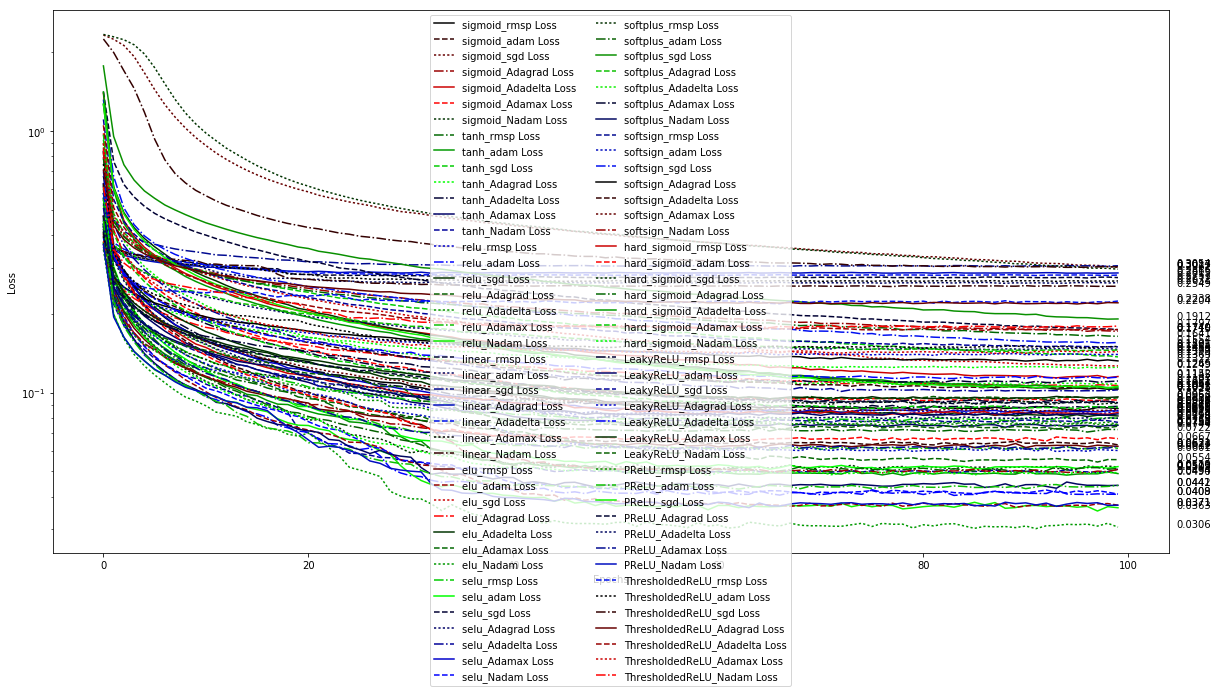

In [9]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

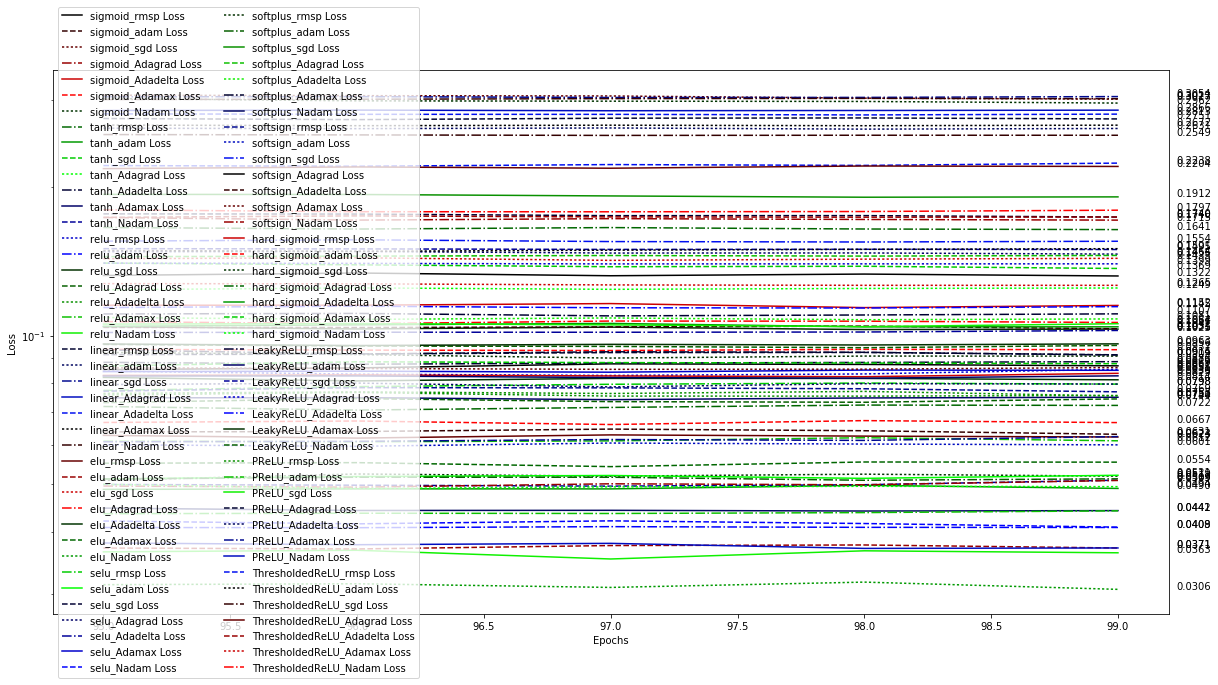

In [10]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [11]:
sorted_by_loss = results.sort_values(by=['loss'])
sorted_by_loss

config       acc      loss  val_acc  val_loss       opt  \
34                 elu_Nadam  0.989707  0.030598  0.98152  0.073232     Nadam   
20                relu_Nadam  0.988327  0.036294  0.97858  0.090803     Nadam   
29                  elu_adam  0.987407  0.037115  0.98068  0.073690      adam   
76               PReLU_Nadam  0.988037  0.037122  0.97928  0.084880     Nadam   
15                 relu_adam  0.986323  0.040846  0.97878  0.080478      adam   
41                selu_Nadam  0.986350  0.040911  0.97976  0.124797     Nadam   
71                PReLU_adam  0.985610  0.044147  0.97864  0.082273      adam   
48            softplus_Nadam  0.985963  0.044193  0.97882  0.084579     Nadam   
8                  tanh_adam  0.983590  0.049014  0.97650  0.086001      adam   
62        hard_sigmoid_Nadam  0.984063  0.049426  0.97564  0.091130     Nadam   
55            softsign_Nadam  0.983667  0.050873  0.97514  0.089075     Nadam   
13                tanh_Nadam  0.983803  0.050940  0.97512  0.091257     Nadam   
43             softplus_adam  0.983327  0.051264  0.97904  0.078117      adam   
6              sigmoid_Nadam  0.983547  0.051909  0.97596  0.087949     Nadam   
36                 selu_adam  0.982710  0.052121  0.97818  0.120456      adam   
33                elu_Adamax  0.981543  0.055411  0.98012  0.068384    Adamax   
50             softsign_adam  0.980560  0.060071  0.97544  0.087088      adam   
19               relu_Adamax  0.980253  0.061220  0.97696  0.078712    Adamax   
28                  elu_rmsp  0.981380  0.062317  0.97998  0.083162      rmsp   
75              PReLU_Adamax  0.980013  0.062437  0.97722  0.079388    Adamax   
1               sigmoid_adam  0.979910  0.063110  0.97582  0.084802      adam   
57         hard_sigmoid_adam  0.978997  0.066652  0.97482  0.086680      adam   
7                  tanh_rmsp  0.977370  0.072218  0.97432  0.091188      rmsp   
69           LeakyReLU_Nadam  0.976363  0.074440  0.97572  0.091563     Nadam   
12               tanh_Adamax  0.975943  0.075025  0.97638  0.078374    Adamax   
70                PReLU_rmsp  0.980197  0.075490  0.97762  0.112528      rmsp   
18             relu_Adadelta  0.977133  0.075650  0.97558  0.088163  Adadelta   
49             softsign_rmsp  0.976270  0.076947  0.97354  0.093331      rmsp   
35                 selu_rmsp  0.976807  0.079768  0.97838  0.124948      rmsp   
74            PReLU_Adadelta  0.975683  0.079787  0.97652  0.084732  Adadelta   
..                       ...       ...       ...      ...       ...       ...   
4           sigmoid_Adadelta  0.965050  0.115176  0.97176  0.094133  Adadelta   
10              tanh_Adagrad  0.961480  0.124940  0.96738  0.105613   Adagrad   
30                   elu_sgd  0.960740  0.126508  0.97138  0.093046       sgd   
52          softsign_Adagrad  0.959627  0.132154  0.96372  0.118135   Adagrad   
9                   tanh_sgd  0.957890  0.136859  0.96742  0.104957       sgd   
66         LeakyReLU_Adagrad  0.957207  0.139867  0.96654  0.112712   Adagrad   
82    ThresholdedReLU_Adamax  0.955340  0.143498  0.96460  0.125064    Adamax   
45          softplus_Adagrad  0.955057  0.145451  0.96846  0.102279   Adagrad   
38              selu_Adagrad  0.955523  0.146356  0.96828  0.130037   Adagrad   
65             LeakyReLU_sgd  0.954647  0.149531  0.96674  0.112480       sgd   
78      ThresholdedReLU_adam  0.951440  0.150123  0.95946  0.147607      adam   
51              softsign_sgd  0.952793  0.155405  0.96104  0.123901       sgd   
59      hard_sigmoid_Adagrad  0.951287  0.164096  0.96074  0.128599   Adagrad   
3            sigmoid_Adagrad  0.948833  0.171520  0.96004  0.129971   Adagrad   
37                  selu_sgd  0.946563  0.174006  0.96332  0.135570       sgd   
81  ThresholdedReLU_Adadelta  0.947930  0.174015  0.96312  0.134127  Adadelta   
83     ThresholdedReLU_Nadam  0.941060  0.179671  0.95496  0.166596     Nadam   
44              softplus_sgd  0.940360  0.191174  0.9

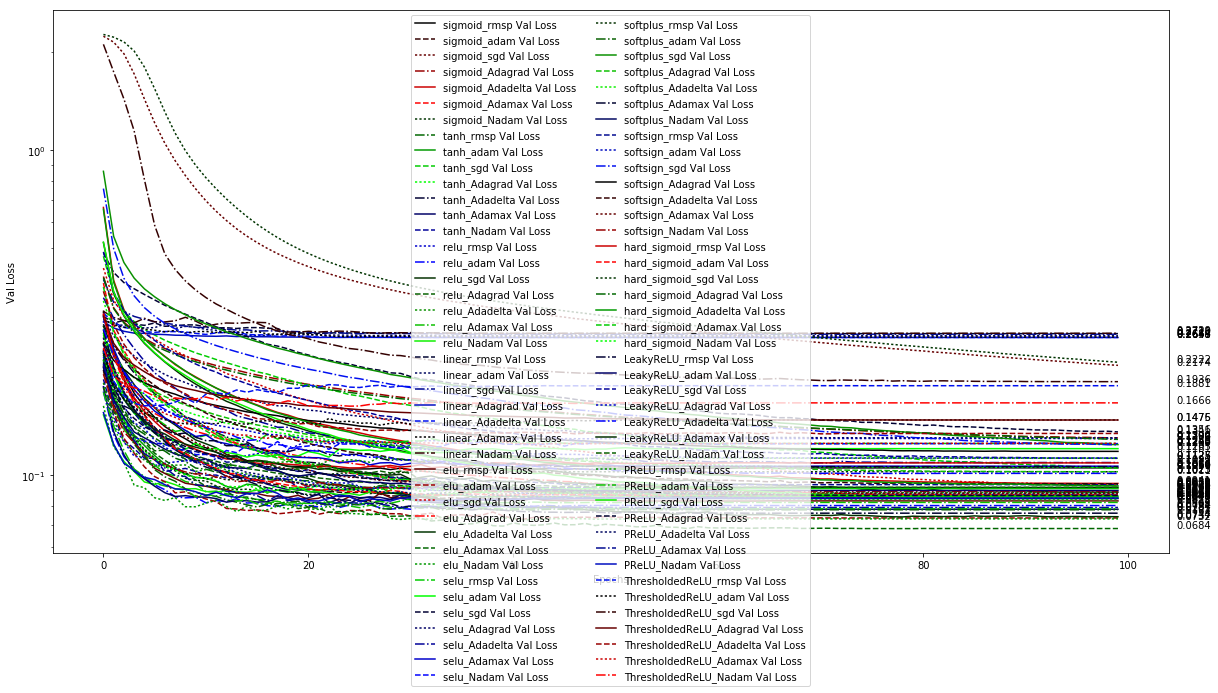

In [12]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

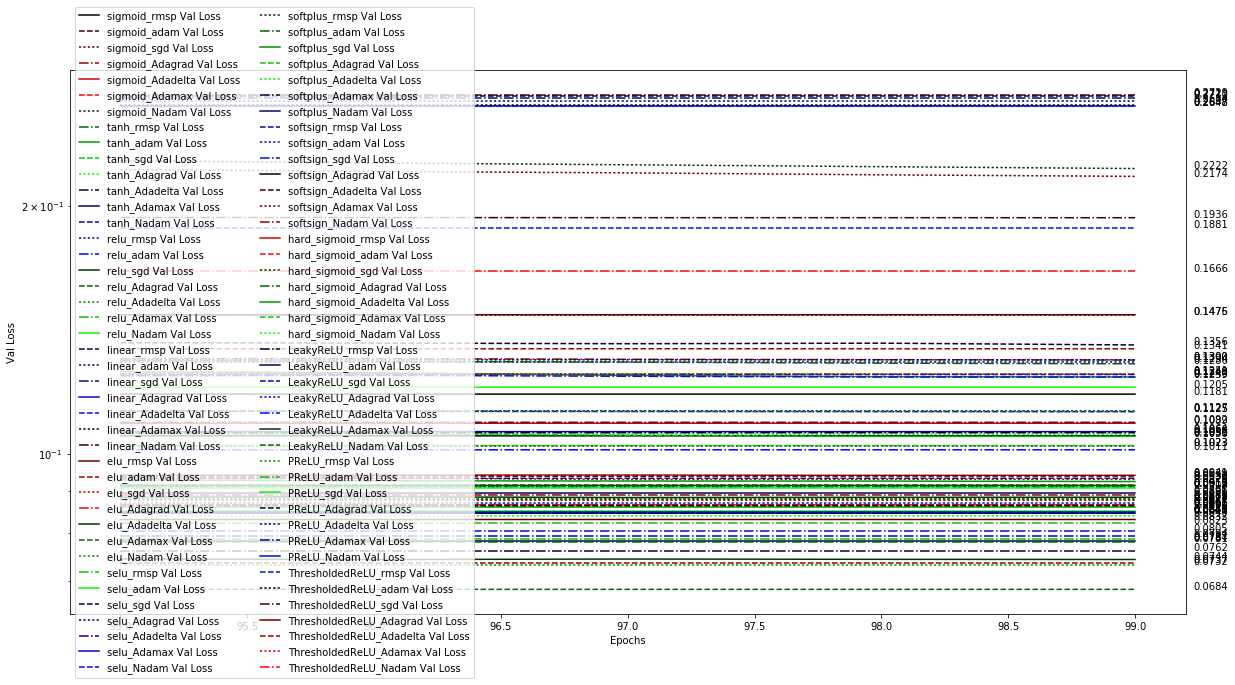

In [13]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [14]:
sorted_by_val_loss = results.sort_values(by=['val_loss'])
sorted_by_val_loss

config       acc      loss  val_acc  val_loss       opt  \
33                elu_Adamax  0.981543  0.055411  0.98012  0.068384    Adamax   
34                 elu_Nadam  0.989707  0.030598  0.98152  0.073232     Nadam   
29                  elu_adam  0.987407  0.037115  0.98068  0.073690      adam   
32              elu_Adadelta  0.974273  0.081392  0.97774  0.074350  Adadelta   
47           softplus_Adamax  0.971837  0.088584  0.97688  0.076242    Adamax   
43             softplus_adam  0.983327  0.051264  0.97904  0.078117      adam   
12               tanh_Adamax  0.975943  0.075025  0.97638  0.078374    Adamax   
19               relu_Adamax  0.980253  0.061220  0.97696  0.078712    Adamax   
75              PReLU_Adamax  0.980013  0.062437  0.97722  0.079388    Adamax   
15                 relu_adam  0.986323  0.040846  0.97878  0.080478      adam   
71                PReLU_adam  0.985610  0.044147  0.97864  0.082273      adam   
28                  elu_rmsp  0.981380  0.062317  0.97998  0.083162      rmsp   
46         softplus_Adadelta  0.966697  0.108145  0.97516  0.084006  Adadelta   
48            softplus_Nadam  0.985963  0.044193  0.97882  0.084579     Nadam   
11             tanh_Adadelta  0.971533  0.091387  0.97400  0.084684  Adadelta   
74            PReLU_Adadelta  0.975683  0.079787  0.97652  0.084732  Adadelta   
1               sigmoid_adam  0.979910  0.063110  0.97582  0.084802      adam   
76               PReLU_Nadam  0.988037  0.037122  0.97928  0.084880     Nadam   
5             sigmoid_Adamax  0.970593  0.093668  0.97346  0.084900    Adamax   
72                 PReLU_sgd  0.967717  0.105736  0.97360  0.085138       sgd   
8                  tanh_adam  0.983590  0.049014  0.97650  0.086001      adam   
61       hard_sigmoid_Adamax  0.972957  0.087736  0.97398  0.086113    Adamax   
73             PReLU_Adagrad  0.971523  0.091459  0.97414  0.086460   Adagrad   
31               elu_Adagrad  0.966550  0.106369  0.97314  0.086655   Adagrad   
57         hard_sigmoid_adam  0.978997  0.066652  0.97482  0.086680      adam   
17              relu_Adagrad  0.970660  0.095559  0.97366  0.086708   Adagrad   
50             softsign_adam  0.980560  0.060071  0.97544  0.087088      adam   
54           softsign_Adamax  0.972457  0.086186  0.97396  0.087800    Adamax   
6              sigmoid_Nadam  0.983547  0.051909  0.97596  0.087949     Nadam   
18             relu_Adadelta  0.977133  0.075650  0.97558  0.088163  Adadelta   
..                       ...       ...       ...      ...       ...       ...   
65             LeakyReLU_sgd  0.954647  0.149531  0.96674  0.112480       sgd   
70                PReLU_rmsp  0.980197  0.075490  0.97762  0.112528      rmsp   
66         LeakyReLU_Adagrad  0.957207  0.139867  0.96654  0.112712   Adagrad   
52          softsign_Adagrad  0.959627  0.132154  0.96372  0.118135   Adagrad   
36                 selu_adam  0.982710  0.052121  0.97818  0.120456      adam   
51              softsign_sgd  0.952793  0.155405  0.96104  0.123901       sgd   
44              softplus_sgd  0.940360  0.191174  0.96154  0.123971       sgd   
41                selu_Nadam  0.986350  0.040911  0.97976  0.124797     Nadam   
35                 selu_rmsp  0.976807  0.079768  0.97838  0.124948      rmsp   
82    ThresholdedReLU_Adamax  0.955340  0.143498  0.96460  0.125064    Adamax   
59      hard_sigmoid_Adagrad  0.951287  0.164096  0.96074  0.128599   Adagrad   
14                 relu_rmsp  0.979123  0.085477  0.97670  0.129425      rmsp   
3            sigmoid_Adagrad  0.948833  0.171520  0.96004  0.129971   Adagrad   
38              selu_Adagrad  0.955523  0.146356  0.96828  0.130037   Adagrad   
81  ThresholdedReLU_Adadelta  0.947930  0.174015  0.96312  0.134127  Adadelta   
37                  selu_sgd  0.946563  0.174006  0.96332  0.135570       sgd   
80   ThresholdedReLU_Adagrad  0.930837  0.220359  0.95532  0.147544   Adagrad   
78      ThresholdedReLU_adam  0.951440  0.150123  0.9

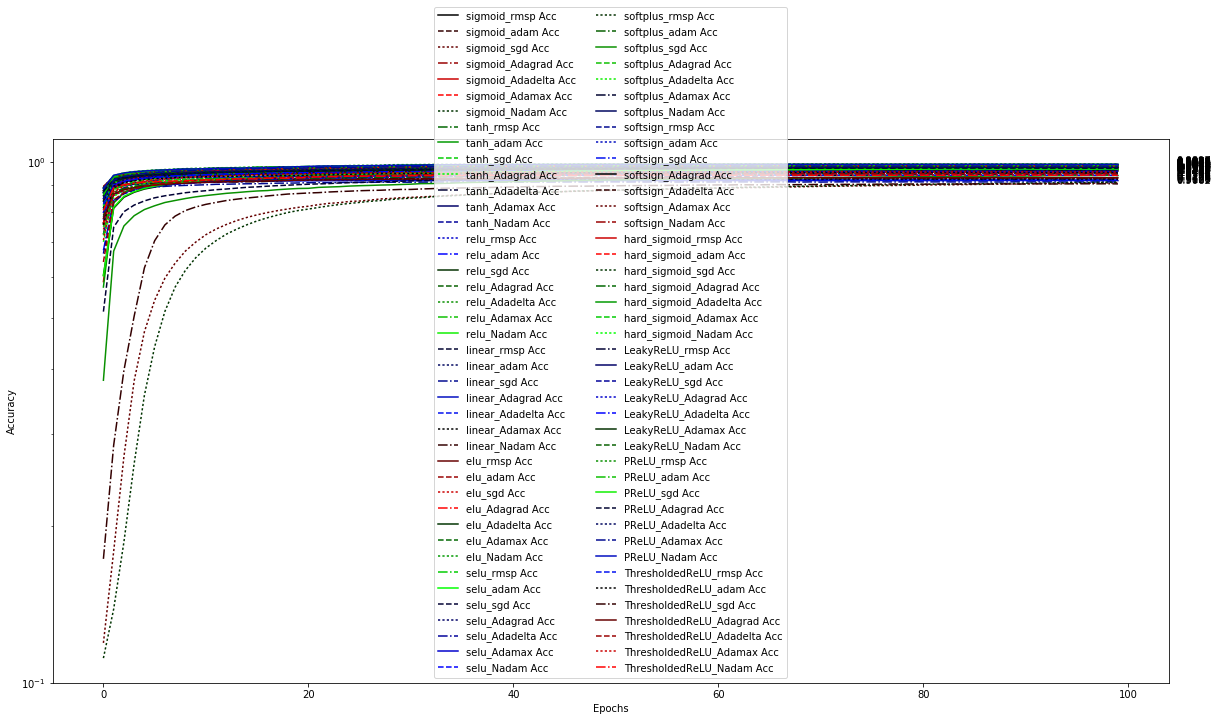

In [15]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

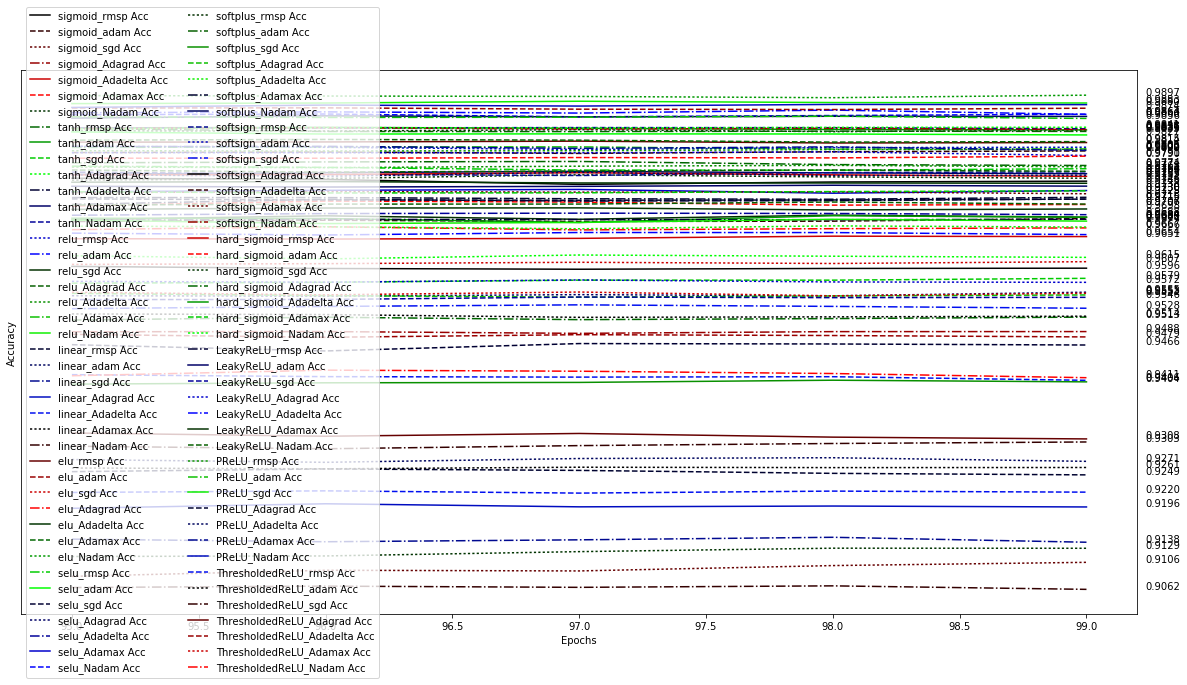

In [16]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [17]:
sorted_by_acc = results.sort_values(by=['acc'], ascending=False)
sorted_by_acc

config       acc      loss  val_acc  val_loss       opt  \
34                 elu_Nadam  0.989707  0.030598  0.98152  0.073232     Nadam   
20                relu_Nadam  0.988327  0.036294  0.97858  0.090803     Nadam   
76               PReLU_Nadam  0.988037  0.037122  0.97928  0.084880     Nadam   
29                  elu_adam  0.987407  0.037115  0.98068  0.073690      adam   
41                selu_Nadam  0.986350  0.040911  0.97976  0.124797     Nadam   
15                 relu_adam  0.986323  0.040846  0.97878  0.080478      adam   
48            softplus_Nadam  0.985963  0.044193  0.97882  0.084579     Nadam   
71                PReLU_adam  0.985610  0.044147  0.97864  0.082273      adam   
62        hard_sigmoid_Nadam  0.984063  0.049426  0.97564  0.091130     Nadam   
13                tanh_Nadam  0.983803  0.050940  0.97512  0.091257     Nadam   
55            softsign_Nadam  0.983667  0.050873  0.97514  0.089075     Nadam   
8                  tanh_adam  0.983590  0.049014  0.97650  0.086001      adam   
6              sigmoid_Nadam  0.983547  0.051909  0.97596  0.087949     Nadam   
43             softplus_adam  0.983327  0.051264  0.97904  0.078117      adam   
36                 selu_adam  0.982710  0.052121  0.97818  0.120456      adam   
33                elu_Adamax  0.981543  0.055411  0.98012  0.068384    Adamax   
28                  elu_rmsp  0.981380  0.062317  0.97998  0.083162      rmsp   
50             softsign_adam  0.980560  0.060071  0.97544  0.087088      adam   
19               relu_Adamax  0.980253  0.061220  0.97696  0.078712    Adamax   
70                PReLU_rmsp  0.980197  0.075490  0.97762  0.112528      rmsp   
75              PReLU_Adamax  0.980013  0.062437  0.97722  0.079388    Adamax   
1               sigmoid_adam  0.979910  0.063110  0.97582  0.084802      adam   
14                 relu_rmsp  0.979123  0.085477  0.97670  0.129425      rmsp   
57         hard_sigmoid_adam  0.978997  0.066652  0.97482  0.086680      adam   
7                  tanh_rmsp  0.977370  0.072218  0.97432  0.091188      rmsp   
18             relu_Adadelta  0.977133  0.075650  0.97558  0.088163  Adadelta   
35                 selu_rmsp  0.976807  0.079768  0.97838  0.124948      rmsp   
69           LeakyReLU_Nadam  0.976363  0.074440  0.97572  0.091563     Nadam   
49             softsign_rmsp  0.976270  0.076947  0.97354  0.093331      rmsp   
12               tanh_Adamax  0.975943  0.075025  0.97638  0.078374    Adamax   
..                       ...       ...       ...      ...       ...       ...   
4           sigmoid_Adadelta  0.965050  0.115176  0.97176  0.094133  Adadelta   
10              tanh_Adagrad  0.961480  0.124940  0.96738  0.105613   Adagrad   
30                   elu_sgd  0.960740  0.126508  0.97138  0.093046       sgd   
52          softsign_Adagrad  0.959627  0.132154  0.96372  0.118135   Adagrad   
9                   tanh_sgd  0.957890  0.136859  0.96742  0.104957       sgd   
66         LeakyReLU_Adagrad  0.957207  0.139867  0.96654  0.112712   Adagrad   
38              selu_Adagrad  0.955523  0.146356  0.96828  0.130037   Adagrad   
82    ThresholdedReLU_Adamax  0.955340  0.143498  0.96460  0.125064    Adamax   
45          softplus_Adagrad  0.955057  0.145451  0.96846  0.102279   Adagrad   
65             LeakyReLU_sgd  0.954647  0.149531  0.96674  0.112480       sgd   
51              softsign_sgd  0.952793  0.155405  0.96104  0.123901       sgd   
78      ThresholdedReLU_adam  0.951440  0.150123  0.95946  0.147607      adam   
59      hard_sigmoid_Adagrad  0.951287  0.164096  0.96074  0.128599   Adagrad   
3            sigmoid_Adagrad  0.948833  0.171520  0.96004  0.129971   Adagrad   
81  ThresholdedReLU_Adadelta  0.947930  0.174015  0.96312  0.134127  Adadelta   
37                  selu_sgd  0.946563  0.174006  0.96332  0.135570       sgd   
83     ThresholdedReLU_Nadam  0.941060  0.179671  0.95496  0.166596     Nadam   
77      ThresholdedReLU_rmsp  0.940620  0.223819  0.9

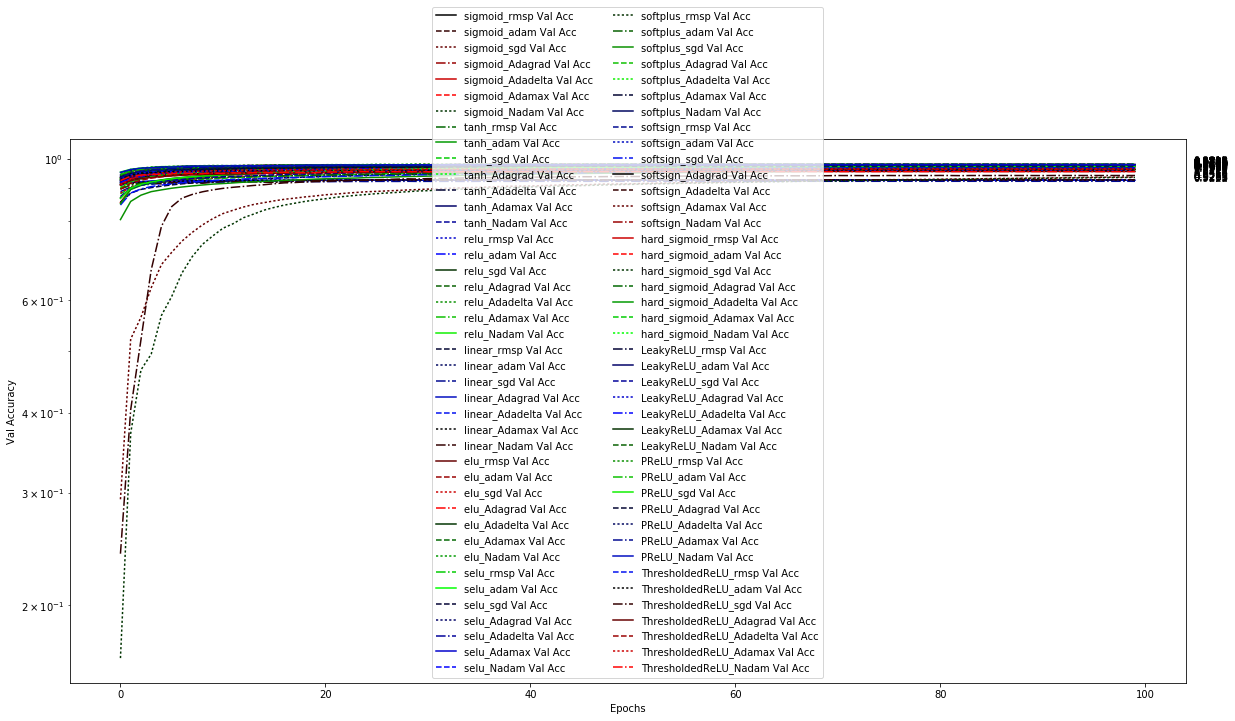

In [18]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

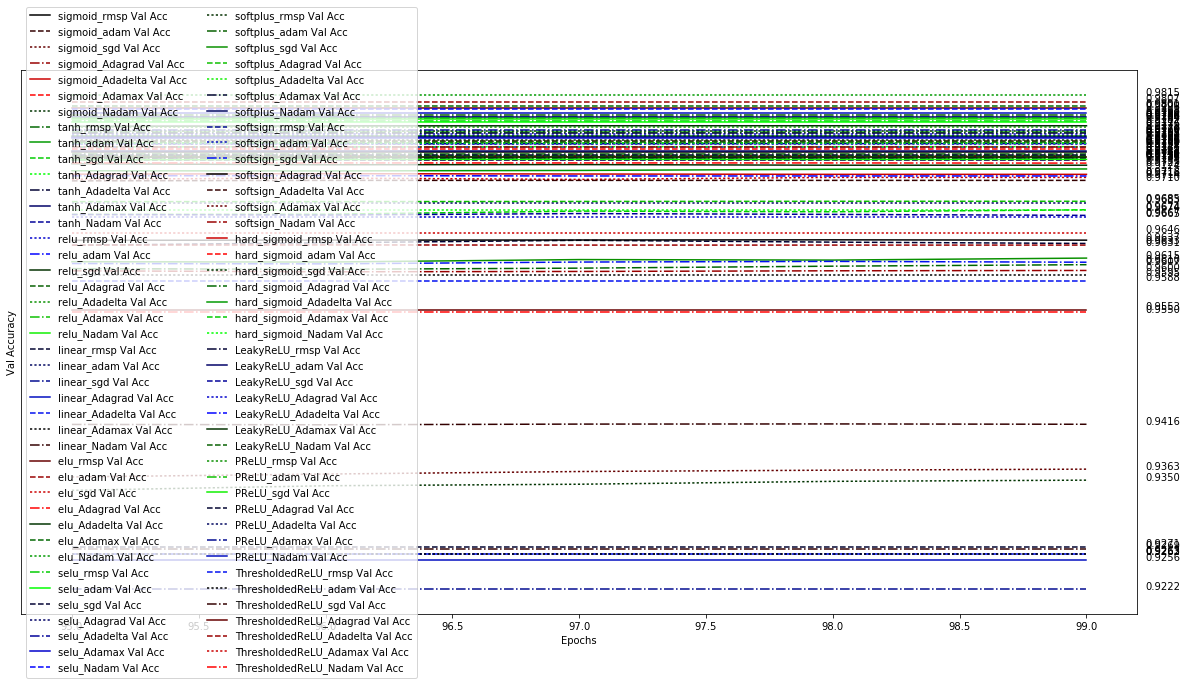

In [19]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [20]:
sorted_by_val_acc = results.sort_values(by=['val_acc'], ascending=False)
sorted_by_val_acc

config       acc      loss  val_acc  val_loss       opt  \
34                 elu_Nadam  0.989707  0.030598  0.98152  0.073232     Nadam   
29                  elu_adam  0.987407  0.037115  0.98068  0.073690      adam   
33                elu_Adamax  0.981543  0.055411  0.98012  0.068384    Adamax   
28                  elu_rmsp  0.981380  0.062317  0.97998  0.083162      rmsp   
41                selu_Nadam  0.986350  0.040911  0.97976  0.124797     Nadam   
76               PReLU_Nadam  0.988037  0.037122  0.97928  0.084880     Nadam   
43             softplus_adam  0.983327  0.051264  0.97904  0.078117      adam   
48            softplus_Nadam  0.985963  0.044193  0.97882  0.084579     Nadam   
15                 relu_adam  0.986323  0.040846  0.97878  0.080478      adam   
71                PReLU_adam  0.985610  0.044147  0.97864  0.082273      adam   
20                relu_Nadam  0.988327  0.036294  0.97858  0.090803     Nadam   
35                 selu_rmsp  0.976807  0.079768  0.97838  0.124948      rmsp   
36                 selu_adam  0.982710  0.052121  0.97818  0.120456      adam   
32              elu_Adadelta  0.974273  0.081392  0.97774  0.074350  Adadelta   
70                PReLU_rmsp  0.980197  0.075490  0.97762  0.112528      rmsp   
75              PReLU_Adamax  0.980013  0.062437  0.97722  0.079388    Adamax   
42             softplus_rmsp  0.975153  0.090916  0.97704  0.102262      rmsp   
19               relu_Adamax  0.980253  0.061220  0.97696  0.078712    Adamax   
47           softplus_Adamax  0.971837  0.088584  0.97688  0.076242    Adamax   
14                 relu_rmsp  0.979123  0.085477  0.97670  0.129425      rmsp   
74            PReLU_Adadelta  0.975683  0.079787  0.97652  0.084732  Adadelta   
8                  tanh_adam  0.983590  0.049014  0.97650  0.086001      adam   
12               tanh_Adamax  0.975943  0.075025  0.97638  0.078374    Adamax   
40               selu_Adamax  0.973013  0.085076  0.97622  0.106351    Adamax   
6              sigmoid_Nadam  0.983547  0.051909  0.97596  0.087949     Nadam   
1               sigmoid_adam  0.979910  0.063110  0.97582  0.084802      adam   
69           LeakyReLU_Nadam  0.976363  0.074440  0.97572  0.091563     Nadam   
62        hard_sigmoid_Nadam  0.984063  0.049426  0.97564  0.091130     Nadam   
18             relu_Adadelta  0.977133  0.075650  0.97558  0.088163  Adadelta   
39             selu_Adadelta  0.968830  0.102472  0.97554  0.109163  Adadelta   
..                       ...       ...       ...      ...       ...       ...   
30                   elu_sgd  0.960740  0.126508  0.97138  0.093046       sgd   
53         softsign_Adadelta  0.968157  0.103295  0.97102  0.093909  Adadelta   
45          softplus_Adagrad  0.955057  0.145451  0.96846  0.102279   Adagrad   
38              selu_Adagrad  0.955523  0.146356  0.96828  0.130037   Adagrad   
9                   tanh_sgd  0.957890  0.136859  0.96742  0.104957       sgd   
10              tanh_Adagrad  0.961480  0.124940  0.96738  0.105613   Adagrad   
65             LeakyReLU_sgd  0.954647  0.149531  0.96674  0.112480       sgd   
66         LeakyReLU_Adagrad  0.957207  0.139867  0.96654  0.112712   Adagrad   
82    ThresholdedReLU_Adamax  0.955340  0.143498  0.96460  0.125064    Adamax   
52          softsign_Adagrad  0.959627  0.132154  0.96372  0.118135   Adagrad   
37                  selu_sgd  0.946563  0.174006  0.96332  0.135570       sgd   
81  ThresholdedReLU_Adadelta  0.947930  0.174015  0.96312  0.134127  Adadelta   
44              softplus_sgd  0.940360  0.191174  0.96154  0.123971       sgd   
51              softsign_sgd  0.952793  0.155405  0.96104  0.123901       sgd   
59      hard_sigmoid_Adagrad  0.951287  0.164096  0.96074  0.128599   Adagrad   
3            sigmoid_Adagrad  0.948833  0.171520  0.96004  0.129971   Adagrad   
78      ThresholdedReLU_adam  0.951440  0.150123  0.95946  0.147607      adam   
77      ThresholdedReLU_rmsp  0.940620  0.223819  0.9

In [21]:
print('---Top by Accuracy---')
print(sorted_by_acc.head())
print('\n---Top by Val Accuracy---')
print(sorted_by_val_acc.head())
print('\n---Top by Loss---')
print(sorted_by_loss.head())
print('\n---Top by Val Loss---')
print(sorted_by_val_loss.head())

---Top by Accuracy---
         config       acc      loss  val_acc  val_loss    opt    act  \
34    elu_Nadam  0.989707  0.030598  0.98152  0.073232  Nadam    elu   
20   relu_Nadam  0.988327  0.036294  0.97858  0.090803  Nadam   relu   
76  PReLU_Nadam  0.988037  0.037122  0.97928  0.084880  Nadam  PReLU   
29     elu_adam  0.987407  0.037115  0.98068  0.073690   adam    elu   
41   selu_Nadam  0.986350  0.040911  0.97976  0.124797  Nadam   selu   

    max_acc_epoch  max_val_acc_epoch  min_loss_epoch  min_val_loss_epoch  
34           85.0               61.0            91.0                41.0  
20           97.0               61.0            97.0                30.0  
76           93.0               57.0            63.0                25.0  
29           69.0               75.0            89.0                41.0  
41           69.0               72.0            99.0                11.0  

---Top by Val Accuracy---
        config       acc      loss  val_acc  val_loss     opt   act 

In [22]:
results['acc_score'] = (results['acc'] - results['acc'].min()) / (results['acc'].max() - results['acc'].min())
results['val_acc_score'] = (results['val_acc'] - results['val_acc'].min()) / (results['val_acc'].max() - results['val_acc'].min())
results['loss_score'] = 1 - (results['loss'] - results['loss'].min()) / (results['loss'].max() - results['loss'].min())
results['val_loss_score'] = 1 - (results['val_loss'] - results['val_loss'].min()) / (results['val_loss'].max() - results['val_loss'].min())
results['val_acc_epoch_score'] = 1 - (results['max_val_acc_epoch'] - results['max_val_acc_epoch'].min()) / (results['max_val_acc_epoch'].max() - results['max_val_acc_epoch'].min())
results['total_score'] = results['acc_score'] * 0.5 + results['loss_score'] * 0.1 + results['val_acc_score'] + results['val_loss_score'] * 0.2 + results['val_acc_epoch_score'] * 0.5
results['total_score_norm'] = (results['total_score'] - results['total_score'].min()) / (results['total_score'].max() - results['total_score'].min())

In [23]:
sorted_by_score = results.sort_values(by=['total_score_norm'], ascending=False)
sorted_by_score.reset_index()

index                    config       acc      loss  val_acc  val_loss  \
0      34                 elu_Nadam  0.989707  0.030598  0.98152  0.073232   
1      76               PReLU_Nadam  0.988037  0.037122  0.97928  0.084880   
2      71                PReLU_adam  0.985610  0.044147  0.97864  0.082273   
3      20                relu_Nadam  0.988327  0.036294  0.97858  0.090803   
4      43             softplus_adam  0.983327  0.051264  0.97904  0.078117   
5      48            softplus_Nadam  0.985963  0.044193  0.97882  0.084579   
6      15                 relu_adam  0.986323  0.040846  0.97878  0.080478   
7      13                tanh_Nadam  0.983803  0.050940  0.97512  0.091257   
8       6             sigmoid_Nadam  0.983547  0.051909  0.97596  0.087949   
9      29                  elu_adam  0.987407  0.037115  0.98068  0.073690   
10     75              PReLU_Adamax  0.980013  0.062437  0.97722  0.079388   
11     42             softplus_rmsp  0.975153  0.090916  0.97704  0.102262   
12      8                 tanh_adam  0.983590  0.049014  0.97650  0.086001   
13     70                PReLU_rmsp  0.980197  0.075490  0.97762  0.112528   
14     62        hard_sigmoid_Nadam  0.984063  0.049426  0.97564  0.091130   
15     57         hard_sigmoid_adam  0.978997  0.066652  0.97482  0.086680   
16     14                 relu_rmsp  0.979123  0.085477  0.97670  0.129425   
17     55            softsign_Nadam  0.983667  0.050873  0.97514  0.089075   
18      1              sigmoid_adam  0.979910  0.063110  0.97582  0.084802   
19     41                selu_Nadam  0.986350  0.040911  0.97976  0.124797   
20     50             softsign_adam  0.980560  0.060071  0.97544  0.087088   
21     28                  elu_rmsp  0.981380  0.062317  0.97998  0.083162   
22     19               relu_Adamax  0.980253  0.061220  0.97696  0.078712   
23     40               selu_Adamax  0.973013  0.085076  0.97622  0.106351   
24     36                 selu_adam  0.982710  0.052121  0.97818  0.120456   
25     33                elu_Adamax  0.981543  0.055411  0.98012  0.068384   
26     18             relu_Adadelta  0.977133  0.075650  0.97558  0.088163   
27     35                 selu_rmsp  0.976807  0.079768  0.97838  0.124948   
28     69           LeakyReLU_Nadam  0.976363  0.074440  0.97572  0.091563   
29     74            PReLU_Adadelta  0.975683  0.079787  0.97652  0.084732   
..    ...                       ...       ...       ...      ...       ...   
54     82    ThresholdedReLU_Adamax  0.955340  0.143498  0.96460  0.125064   
55     16                  relu_sgd  0.968410  0.103134  0.97288  0.088503   
56      4          sigmoid_Adadelta  0.965050  0.115176  0.97176  0.094133   
57     60     hard_sigmoid_Adadelta  0.968377  0.104230  0.97242  0.092483   
58     30                   elu_sgd  0.960740  0.126508  0.97138  0.093046   
59     78      ThresholdedReLU_adam  0.951440  0.150123  0.95946  0.147607   
60     10              tanh_Adagrad  0.961480  0.124940  0.96738  0.105613   
61     77      ThresholdedReLU_rmsp  0.940620  0.223819  0.95876  0.188136   
62     45          softplus_Adagrad  0.955057  0.145451  0.96846  0.102279   
63      9                  tanh_sgd  0.957890  0.136859  0.96742  0.104957   
64     65             LeakyReLU_sgd  0.954647  0.149531  0.96674  0.112480   
65     83     ThresholdedReLU_Nadam  0.941060  0.179671  0.95496  0.166596   
66     52          softsign_Adagrad  0.959627  0.132154  0.96372  0.118135   
67     81  ThresholdedReLU_Adadelta  0.947930  0.174015  0.96312  0.134127   
68     51              softsign_sgd  0.952793  0.155405  0.96104  0.123901   
69     37                  selu_sgd  0.946563  0.174006  0.96332  0.135570   
70     59      hard_sigmoid_Adagrad  0.951287  0.164096  0.96074  0.128599   
71      3           sigmoid_Adagrad  0.948833  0.171520  0.96004  0.129971   
72     44              softplus_sgd  0.940360  0.191174  0.96154  0.123971   
73     80   ThresholdedReL

In [24]:
sorted_by_score.to_csv('./results_var_lr.csv')

In [25]:
val_loss_tbl = pd.DataFrame(index=['Adadelta', 'Adagrad', 'adam', 'Adamax', 'Nadam', 'rmsp', 'sgd'], 
                            columns=['elu', 'hard_sigmoid', 'LeakyReLU', 'linear', 'PReLU', 'relu', 'selu', 'sigmoid', 'softplus', 
                                     'softsign', 'tanh', 'ThresholdedReLU'])
